 # Economic indicators and financial markets....

In [1]:
import quandl

quandl.ApiConfig.api_key = '3xjsCJYuffMHcpR1r3rX'
gdp_data = quandl.get("FRED/GDP", start_date="2001-01-01", end_date="2020-12-31")
unemployment_data = quandl.get("FRED/UNRATE", start_date="2001-01-01", end_date="2020-12-31")
cpi_data = quandl.get("FRED/CPIAUCNS", start_date="2001-01-01", end_date="2020-12-31")
usa_fedral=quandl.get('FED/SUBLPDMHS_XWB_N_Q', start_date='2001-01-01', end_date='2020-12-31')
#sp500_data = quandl.get("FRED/SP500", start_date="2001-01-01", end_date="2020-12-31")
treasury_yield_data = quandl.get("FRED/DGS10", start_date="2001-01-01", end_date="2020-12-31")
corporate_profits_data = quandl.get("FRED/CP", start_date="2001-01-01", end_date="2020-12-31")
housing_starts_data = quandl.get("FRED/HOUST", start_date="2001-01-01", end_date="2020-12-31")
#consumer_confidence_data = quandl.get("FRED/USACONFCOMINFKNFRMEI", start_date="2001-01-01", end_date="2020-12-31")


In [2]:
# Save the datasets to CSV files
gdp_data.to_csv("gdp_data.csv")
unemployment_data.to_csv("unemployment_data.csv")
cpi_data.to_csv("cpi_data.csv")
usa_fedral.to_csv('usa_fedral.csv')

treasury_yield_data.to_csv("treasury_yield_data.csv")
corporate_profits_data.to_csv("corporate_profits_data.csv")
housing_starts_data.to_csv("housing_starts_data.csv")

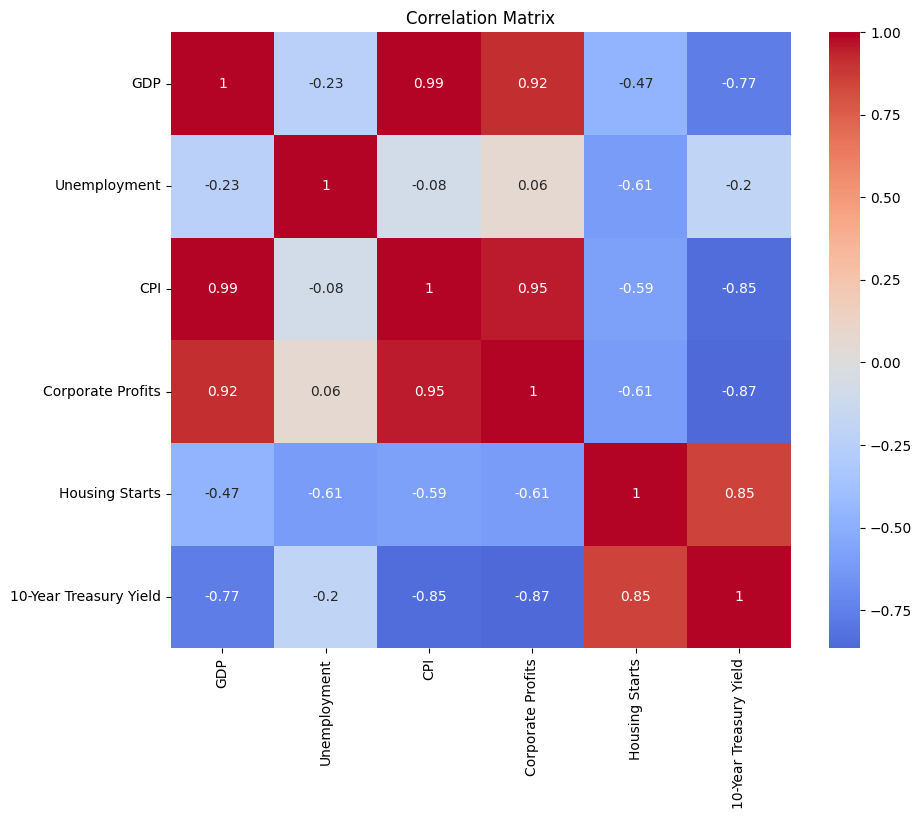

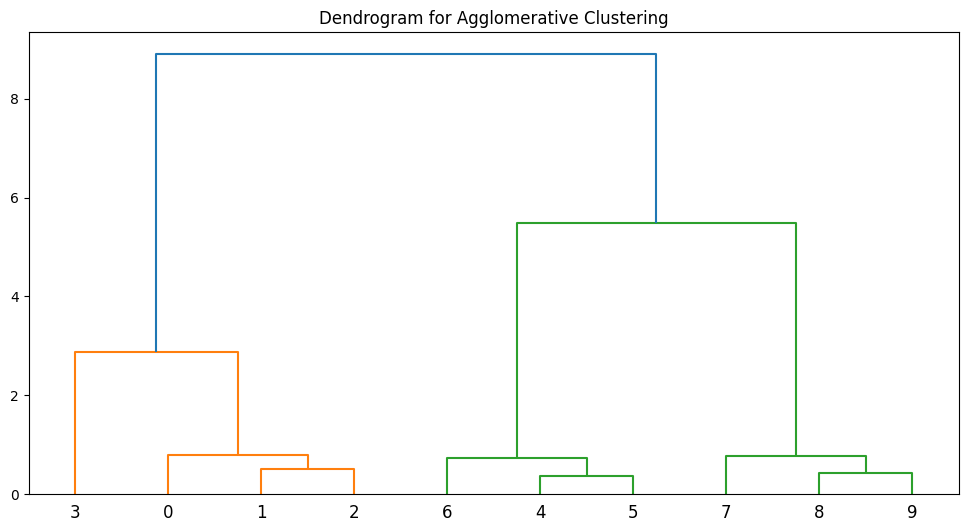

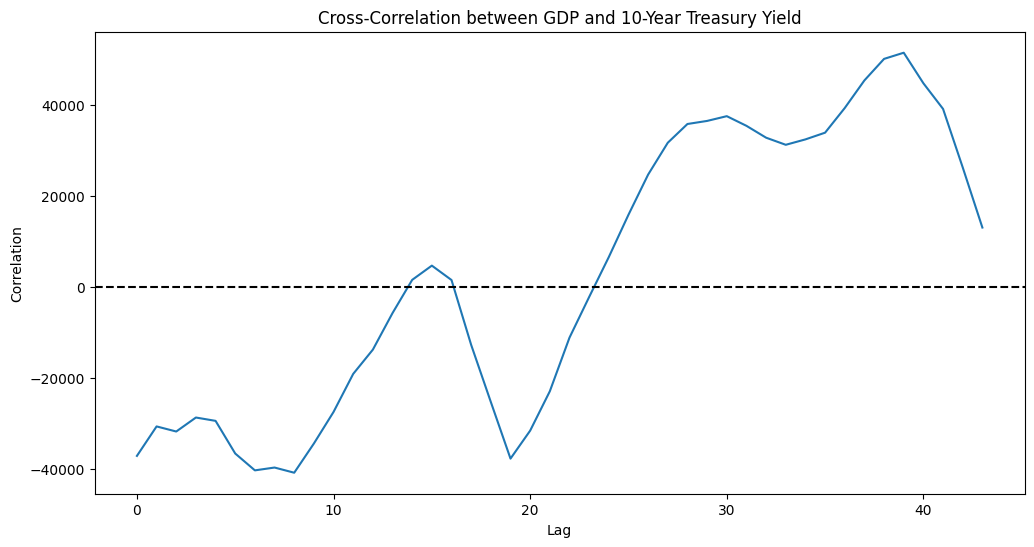


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2174  , p=0.6458  , df_denom=21, df_num=1
ssr based chi2 test:   chi2=0.2484  , p=0.6182  , df=1
likelihood ratio test: chi2=0.2472  , p=0.6191  , df=1
parameter F test:         F=0.2174  , p=0.6458  , df_denom=21, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7088  , p=0.5055  , df_denom=18, df_num=2
ssr based chi2 test:   chi2=1.8114  , p=0.4042  , df=2
likelihood ratio test: chi2=1.7437  , p=0.4182  , df=2
parameter F test:         F=0.7088  , p=0.5055  , df_denom=18, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1118  , p=0.7415  , df_denom=21, df_num=1
ssr based chi2 test:   chi2=0.1277  , p=0.7208  , df=1
likelihood ratio test: chi2=0.1274  , p=0.7212  , df=1
parameter F test:         F=0.1118  , p=0.7415  , df_denom=21, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7834  , p=0.4718  , df_d

C:\Users\katya\OneDrive - Manipal Academy of Higher Education\files and documents\Manipal\dmpa lab fr\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\katya\OneDrive - Manipal Academy of Higher Education\files and documents\Manipal\dmpa lab fr\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\katya\OneDrive - Manipal Academy of Higher Education\files and documents\Manipal\dmpa lab fr\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from statsmodels.tsa.stattools import grangercausalitytests

# Load data
gdp_data = pd.read_csv('gdp_data.csv', parse_dates=['Date'], index_col='Date')
unemployment_data = pd.read_csv('unemployment_data.csv', parse_dates=['Date'], index_col='Date')
cpi_data = pd.read_csv('cpi_data.csv', parse_dates=['Date'], index_col='Date')
corporate_profits_data = pd.read_csv('corporate_profits_data.csv', parse_dates=['Date'], index_col='Date')
housing_starts_data = pd.read_csv('housing_starts_data.csv', parse_dates=['Date'], index_col='Date')
treasury_yield_data = pd.read_csv('treasury_yield_data.csv', parse_dates=['Date'], index_col='Date')

# Combine data
combined_data = pd.concat([gdp_data, unemployment_data, cpi_data, corporate_profits_data, housing_starts_data, treasury_yield_data], axis=1)
combined_data.columns = ['GDP', 'Unemployment', 'CPI', 'Corporate Profits', 'Housing Starts', '10-Year Treasury Yield']

# Clean data
cleaned_data = combined_data.asfreq('Q', method='bfill').truncate(before='2001-03-31', after='2020-10-01')

# Correlation analysis
correlation_matrix = cleaned_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()


# Clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data.dropna())
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(scaled_data)

# Convert children_ to linkage matrix for dendrogram
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([model.children_, model.distances_,
                                  counts]).astype(float)

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Agglomerative Clustering")
plt.show()


# Cross-Correlation
def ccf(x, y, lag_max = 100):
    result = np.correlate(y - np.mean(y), x - np.mean(x), mode='full')
    length = len(result)
    return result[length // 2: length // 2 + lag_max]

# Plot cross-correlation between GDP and 10-Year Treasury Yield
cross_corr_gdp_treasury = ccf(cleaned_data['GDP'].dropna(), cleaned_data['10-Year Treasury Yield'].dropna())
plt.figure(figsize=(12, 6))
plt.plot(cross_corr_gdp_treasury)
plt.axhline(y=0, linestyle='--', color='black')
plt.title('Cross-Correlation between GDP and 10-Year Treasury Yield')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

# Granger Causality Tests
granger_result_gdp_unemployment = grangercausalitytests(cleaned_data[['GDP', 'Unemployment']].dropna(), maxlag=2, verbose=True)
granger_result_gdp_cpi = grangercausalitytests(cleaned_data[['GDP', 'CPI']].dropna(), maxlag=2, verbose=True)
granger_result_gdp_treasury = grangercausalitytests(cleaned_data[['GDP', '10-Year Treasury Yield']].dropna(), maxlag=2, verbose=True)
# Policy and Investment Implications
# This would be more qualitative and based on the insights from the above analyses. 
# For instance, if a cluster represents economic downturn, policies can be suggested to boost economic activity.
# Similarly, if a cluster indicates high inflation, monetary policies can be suggested to control inflation.

print("""
Policy and Investment Implications:

1. For clusters indicating economic downturns: 
    - Increase government spending to boost economic activity.
    - Consider policies that encourage consumer spending.
    - Lower interest rates to encourage borrowing and investments.
    
2. For clusters indicating high inflation:
    - Implement tighter monetary policies.
    - Consider increasing interest rates to control price rise.
    - Encourage policies that boost production and supply.

3. For investors, clusters indicating economic growth can be seen as a good time to invest in equities, 
   while downturns might be better for safer investments like bonds.

Note: These are general implications and should be tailored based on specific cluster characteristics.
""")



C:\Users\katya\OneDrive - Manipal Academy of Higher Education\files and documents\Manipal\dmpa lab fr\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


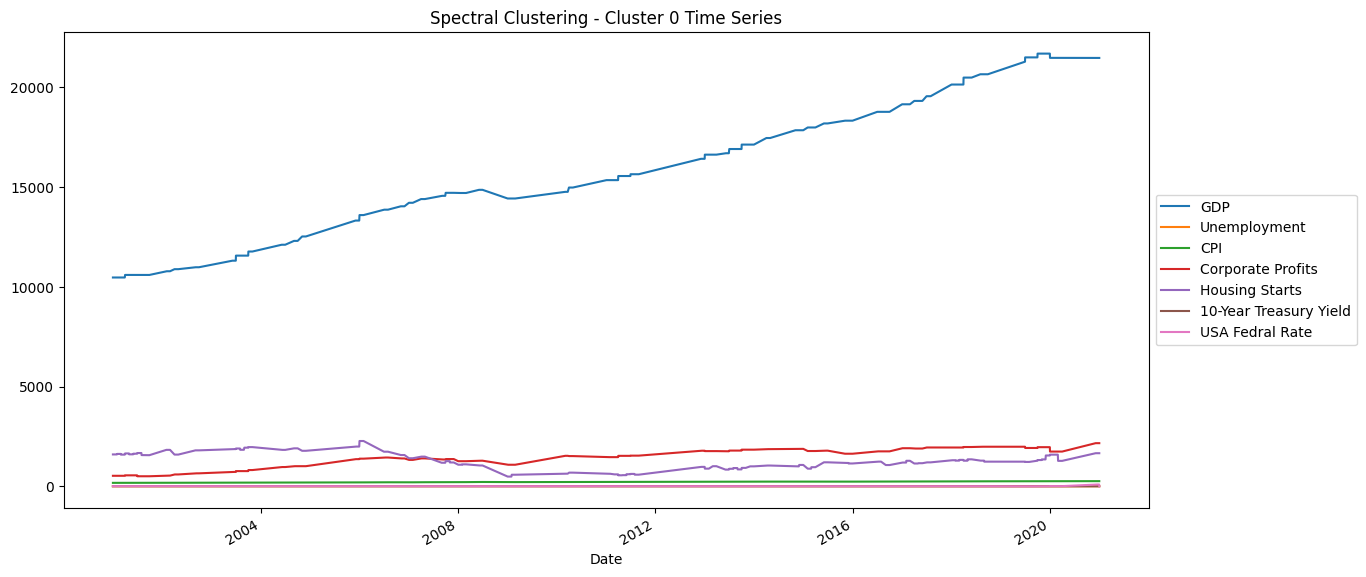

In [4]:
# Re-importing necessary libraries and data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering, OPTICS, AgglomerativeClustering
import matplotlib.pyplot as plt

# Re-importing the datasets and combining them
gdp_data = pd.read_csv('gdp_data.csv', parse_dates=['Date'], index_col='Date')
unemployment_data = pd.read_csv('unemployment_data.csv', parse_dates=['Date'], index_col='Date')
cpi_data = pd.read_csv('cpi_data.csv', parse_dates=['Date'], index_col='Date')
corporate_profits_data = pd.read_csv('corporate_profits_data.csv', parse_dates=['Date'], index_col='Date')
housing_starts_data = pd.read_csv('housing_starts_data.csv', parse_dates=['Date'], index_col='Date')
treasury_yield_data = pd.read_csv('treasury_yield_data.csv', parse_dates=['Date'], index_col='Date')
usa_fedral_data = pd.read_csv('usa_fedral.csv', parse_dates=['Date'], index_col='Date')

combined_data_filled = pd.concat([
    gdp_data, 
    unemployment_data, 
    cpi_data, 
    corporate_profits_data, 
    housing_starts_data, 
    treasury_yield_data,
    usa_fedral_data
], axis=1, join='outer')

combined_data_filled.columns = [
    'GDP', 
    'Unemployment', 
    'CPI', 
    'Corporate Profits', 
    'Housing Starts', 
    '10-Year Treasury Yield',
    'USA Fedral Rate'
]

# Forward-fill and backward-fill for missing values
combined_data_filled.ffill(inplace=True)
combined_data_filled.bfill(inplace=True)

# Scaling the data
scaler = StandardScaler()
scaled_data_filled = scaler.fit_transform(combined_data_filled)

# Applying clustering algorithms again
spectral_model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
spectral_labels_filled = spectral_model.fit_predict(scaled_data_filled)

# Adding cluster labels to the dataframe
combined_data_filled['Spectral_Cluster'] = spectral_labels_filled

# Visualizing the first cluster from the Spectral Clustering algorithm
cluster_0_data = combined_data_filled[combined_data_filled['Spectral_Cluster'] == 0]

plt.figure(figsize=(14, 7))
cluster_0_data[['GDP', 'Unemployment', 'CPI', 'Corporate Profits', 'Housing Starts', '10-Year Treasury Yield', 'USA Fedral Rate']].plot(ax=plt.gca())
plt.title('Spectral Clustering - Cluster 0 Time Series')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


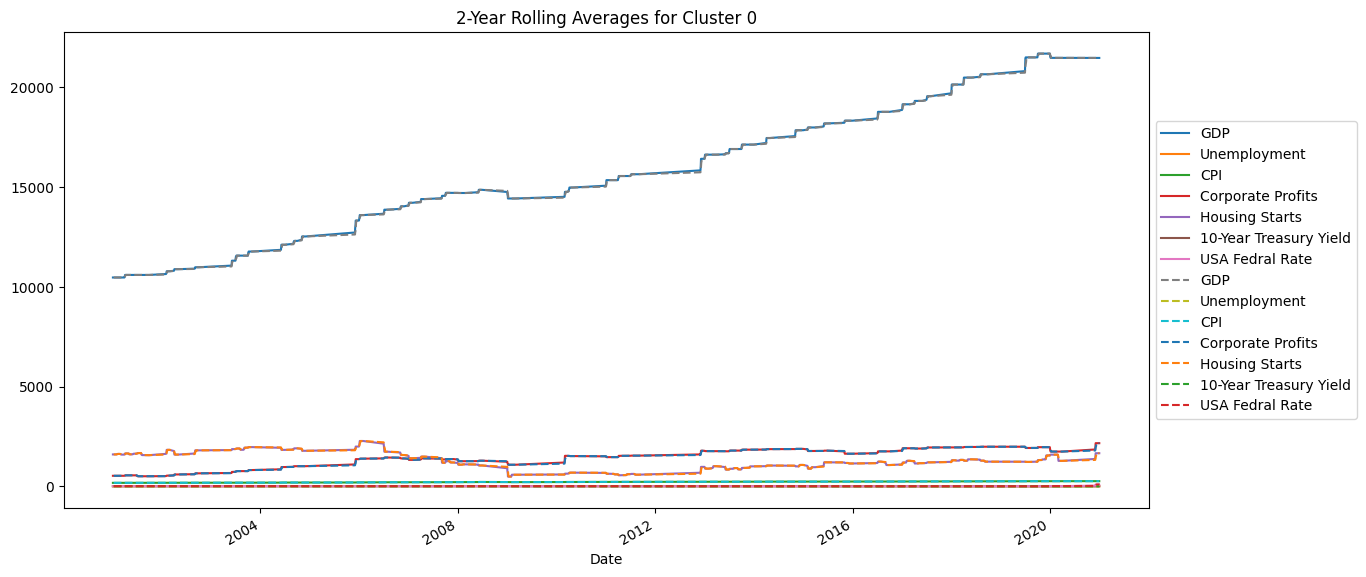

In [5]:
# Computing 1-year and 2-year rolling averages for Cluster 0 data
cluster_0_data_1year_rolling = cluster_0_data[['GDP', 'Unemployment', 'CPI', 'Corporate Profits', 'Housing Starts', '10-Year Treasury Yield', 'USA Fedral Rate']].rolling(window=4).mean()
cluster_0_data_2year_rolling = cluster_0_data[['GDP', 'Unemployment', 'CPI', 'Corporate Profits', 'Housing Starts', '10-Year Treasury Yield', 'USA Fedral Rate']].rolling(window=8).mean()

plt.figure(figsize=(14, 7))
cluster_0_data_1year_rolling.plot(ax=plt.gca(), title='1-Year Rolling Averages for Cluster 0', legend=False)
cluster_0_data_2year_rolling.plot(ax=plt.gca(), title='2-Year Rolling Averages for Cluster 0', linestyle='dashed')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


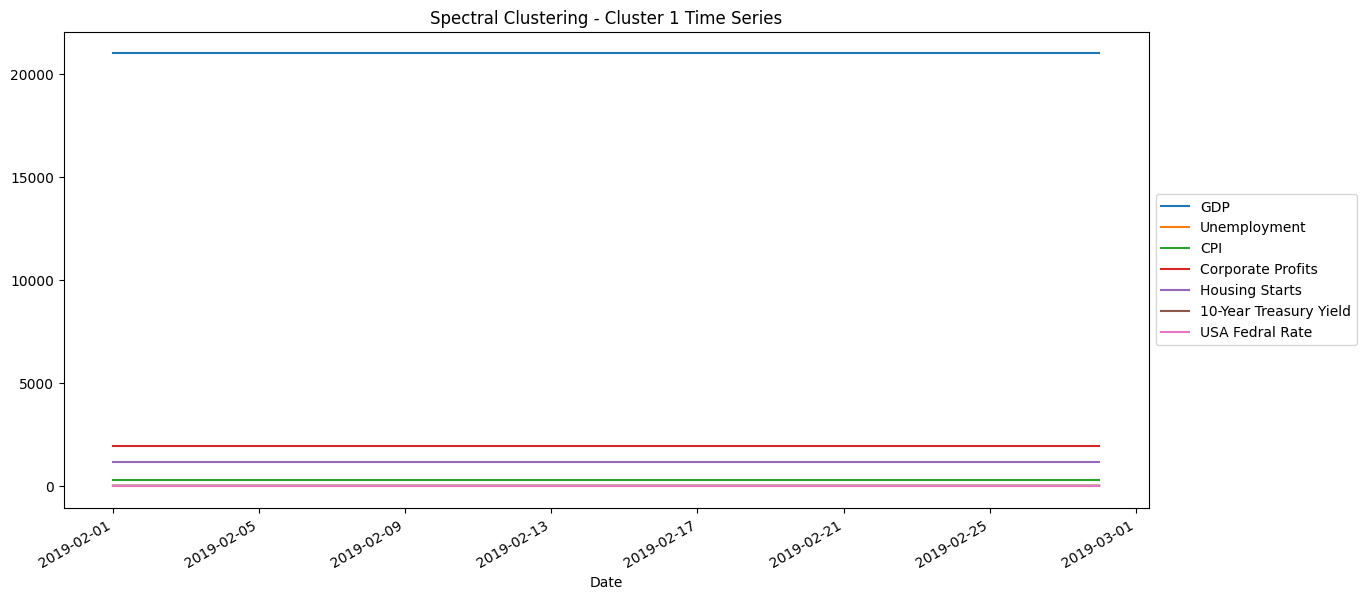

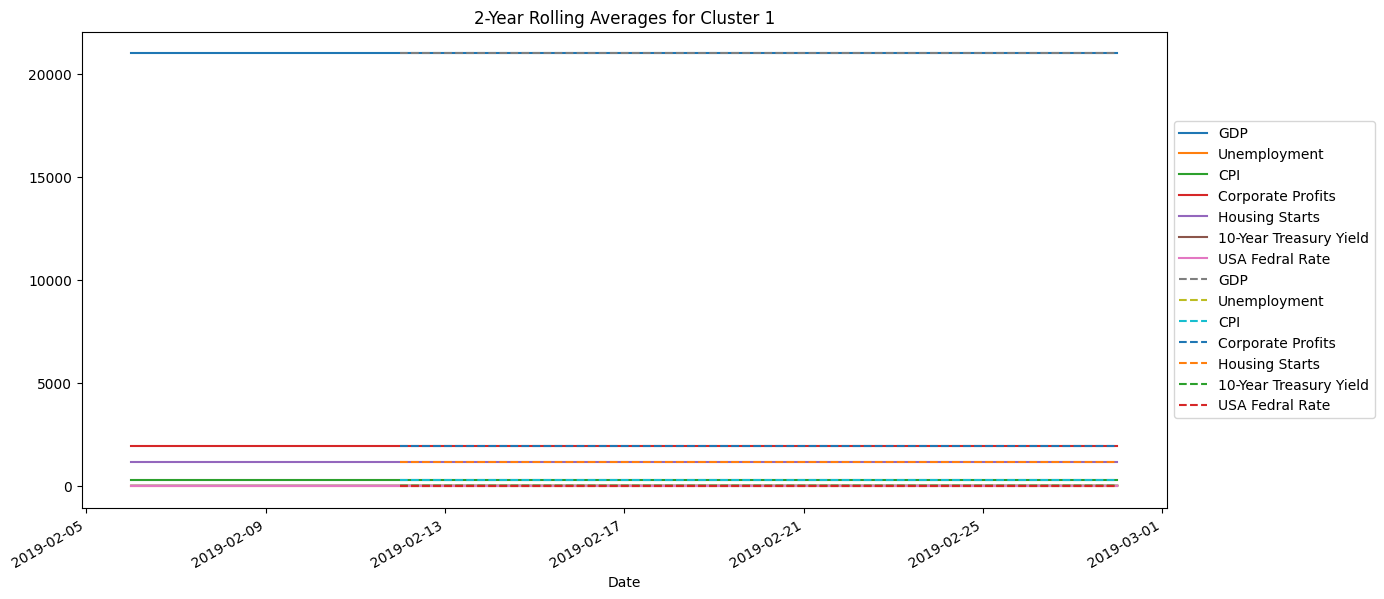

In [6]:
# Visualizing Cluster 1 from the Spectral Clustering algorithm
cluster_1_data = combined_data_filled[combined_data_filled['Spectral_Cluster'] == 1]

plt.figure(figsize=(14, 7))
cluster_1_data[['GDP', 'Unemployment', 'CPI', 'Corporate Profits', 'Housing Starts', '10-Year Treasury Yield', 'USA Fedral Rate']].plot(ax=plt.gca())
plt.title('Spectral Clustering - Cluster 1 Time Series')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Computing 1-year and 2-year rolling averages for Cluster 1 data
cluster_1_data_1year_rolling = cluster_1_data[['GDP', 'Unemployment', 'CPI', 'Corporate Profits', 'Housing Starts', '10-Year Treasury Yield', 'USA Fedral Rate']].rolling(window=4).mean()
cluster_1_data_2year_rolling = cluster_1_data[['GDP', 'Unemployment', 'CPI', 'Corporate Profits', 'Housing Starts', '10-Year Treasury Yield', 'USA Fedral Rate']].rolling(window=8).mean()

plt.figure(figsize=(14, 7))
cluster_1_data_1year_rolling.plot(ax=plt.gca(), title='1-Year Rolling Averages for Cluster 1', legend=False)
cluster_1_data_2year_rolling.plot(ax=plt.gca(), title='2-Year Rolling Averages for Cluster 1', linestyle='dashed')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

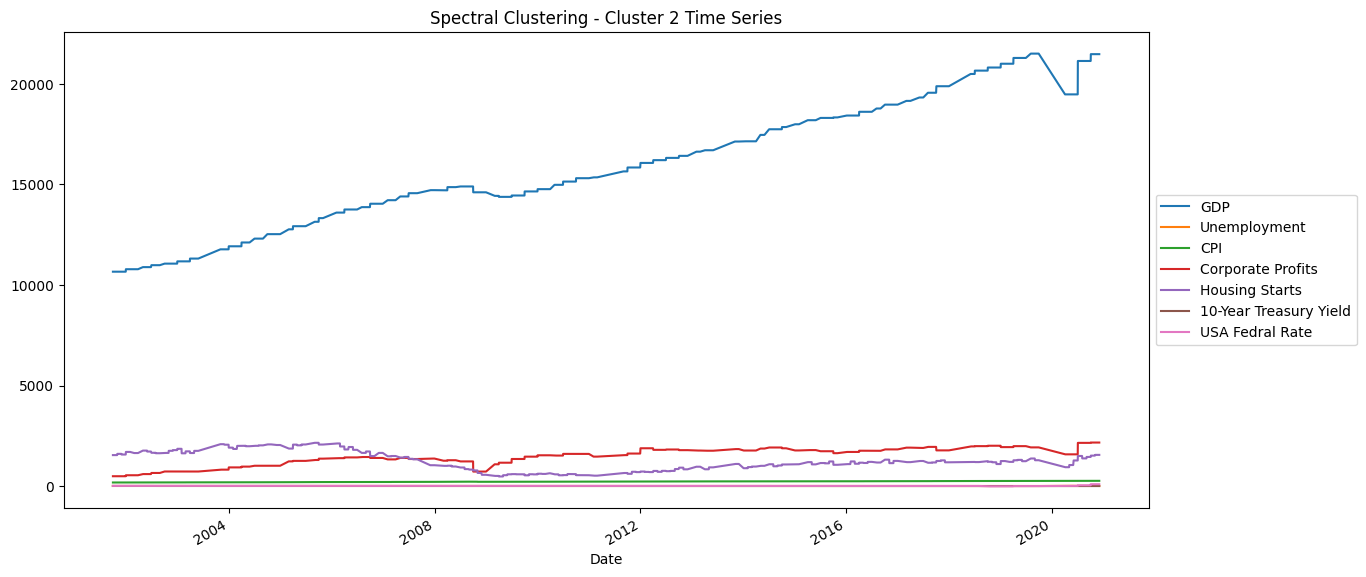

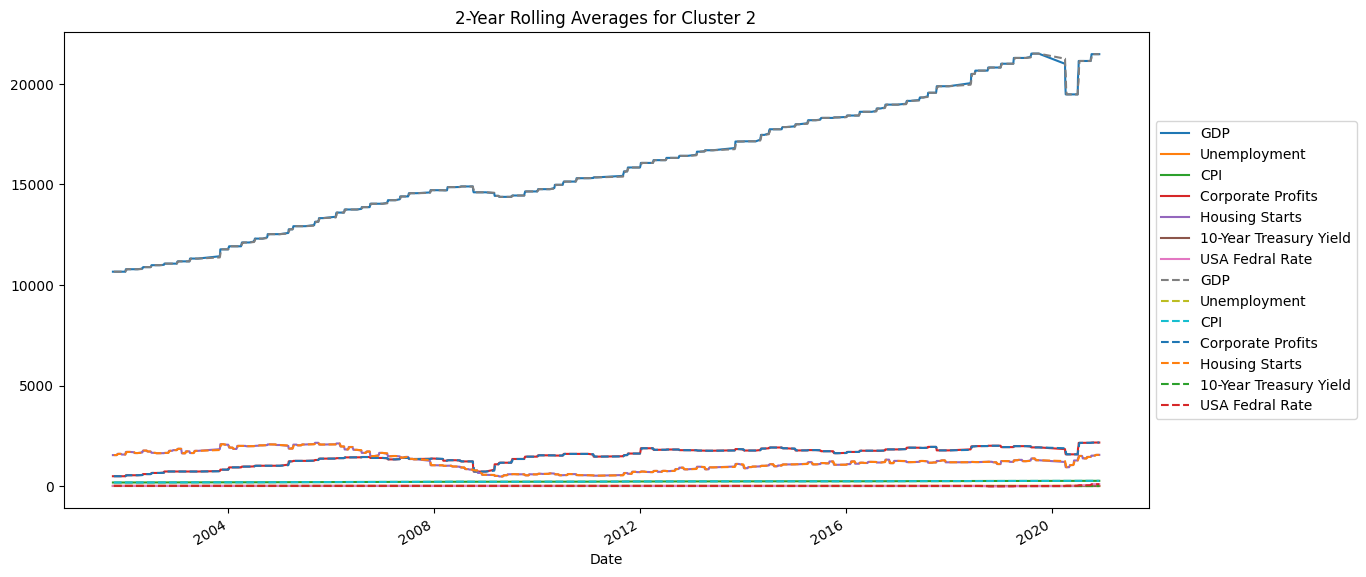

In [7]:
# Visualizing Cluster 2 from the Spectral Clustering algorithm
cluster_2_data = combined_data_filled[combined_data_filled['Spectral_Cluster'] == 2]

plt.figure(figsize=(14, 7))
cluster_2_data[['GDP', 'Unemployment', 'CPI', 'Corporate Profits', 'Housing Starts', '10-Year Treasury Yield', 'USA Fedral Rate']].plot(ax=plt.gca())
plt.title('Spectral Clustering - Cluster 2 Time Series')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Computing 1-year and 2-year rolling averages for Cluster 2 data
cluster_2_data_1year_rolling = cluster_2_data[['GDP', 'Unemployment', 'CPI', 'Corporate Profits', 'Housing Starts', '10-Year Treasury Yield', 'USA Fedral Rate']].rolling(window=4).mean()
cluster_2_data_2year_rolling = cluster_2_data[['GDP', 'Unemployment', 'CPI', 'Corporate Profits', 'Housing Starts', '10-Year Treasury Yield', 'USA Fedral Rate']].rolling(window=8).mean()

plt.figure(figsize=(14, 7))
cluster_2_data_1year_rolling.plot(ax=plt.gca(), title='1-Year Rolling Averages for Cluster 2', legend=False)
cluster_2_data_2year_rolling.plot(ax=plt.gca(), title='2-Year Rolling Averages for Cluster 2', linestyle='dashed')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


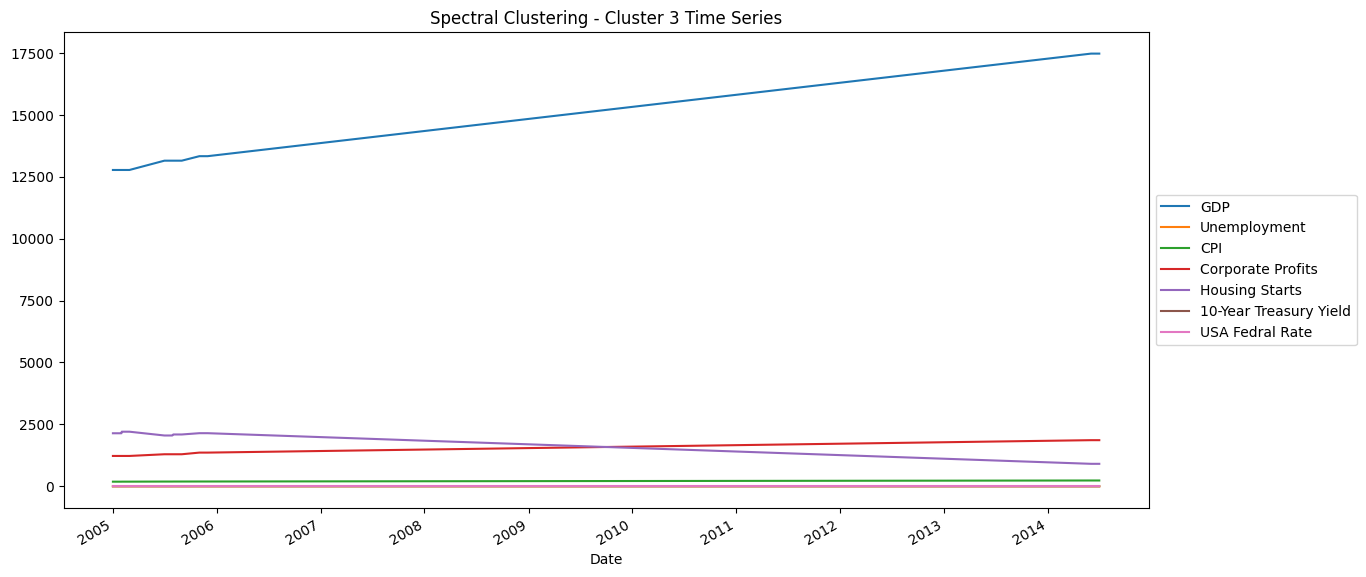

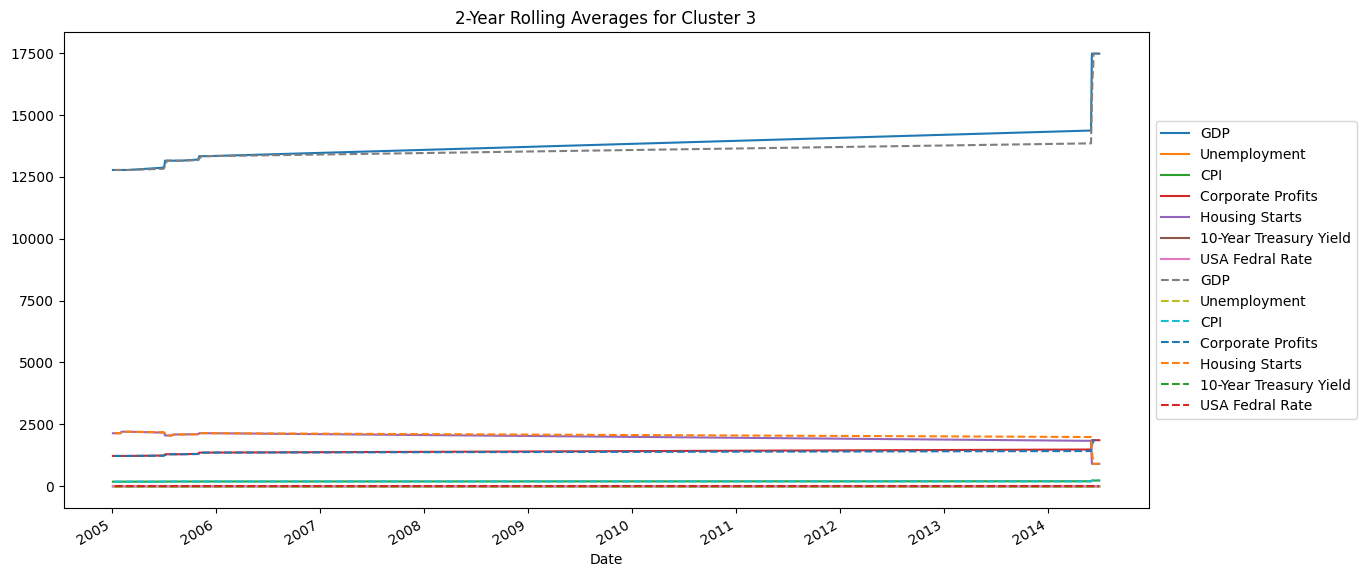

In [8]:
# Visualizing Cluster 3 from the Spectral Clustering algorithm
cluster_3_data = combined_data_filled[combined_data_filled['Spectral_Cluster'] == 3]

plt.figure(figsize=(14, 7))
cluster_3_data[['GDP', 'Unemployment', 'CPI', 'Corporate Profits', 'Housing Starts', '10-Year Treasury Yield', 'USA Fedral Rate']].plot(ax=plt.gca())
plt.title('Spectral Clustering - Cluster 3 Time Series')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Computing 1-year and 2-year rolling averages for Cluster 3 data
cluster_3_data_1year_rolling = cluster_3_data[['GDP', 'Unemployment', 'CPI', 'Corporate Profits', 'Housing Starts', '10-Year Treasury Yield', 'USA Fedral Rate']].rolling(window=4).mean()
cluster_3_data_2year_rolling = cluster_3_data[['GDP', 'Unemployment', 'CPI', 'Corporate Profits', 'Housing Starts', '10-Year Treasury Yield', 'USA Fedral Rate']].rolling(window=8).mean()

plt.figure(figsize=(14, 7))
cluster_3_data_1year_rolling.plot(ax=plt.gca(), title='1-Year Rolling Averages for Cluster 3', legend=False)
cluster_3_data_2year_rolling.plot(ax=plt.gca(), title='2-Year Rolling Averages for Cluster 3', linestyle='dashed')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set(color_codes=True)

### loading and merging useful data(that is not an outlier) for further study....

In [10]:
population_per_country = pd.read_csv('PopulationPerCountry.csv', skiprows = range(0,4))
population_per_country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN,NaN


In [11]:
GDP_Country = pd.read_csv('GDP by Country.csv', skiprows = range(0,4))
GDP_Country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN,NaN


In [12]:
GDP_Data = pd.merge(GDP_Country, population_per_country, on= ['Country Code','Country Name'], how='inner')
GDP_Data.head()

,Country Name,Country Code,Indicator Name_x,Indicator Code_x,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,...,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,Unnamed: 62_y
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN,NaN


In [13]:
GDP_Data = GDP_Data.drop(['Indicator Name_x','Indicator Code_x','Indicator Name_y','Indicator Code_y','Unnamed: 62_y','Unnamed: 62_x'], axis = 1)
GDP_Data.head()

,Country Name,Country Code,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,1966_x,1967_x,...,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN
1,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN


In [14]:
GDP_Data1 = pd.DataFrame()
for col in GDP_Data.columns:
    if col.endswith("Name"):
        country = col[:]
        GDP_Data1[country] = GDP_Data[country]
    if col.endswith("_x"):
        year = col[:4]
        GDP_Data1[year] = GDP_Data[year + '_x']/GDP_Data[year + '_y']
    if col.endswith("Code"):
        code = col[:]
        GDP_Data1[code] = GDP_Data[code]
        
GDP_Data1.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27546.899390,24631.434860,24271.940421,25324.720362,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,137.899362,161.322,...,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923,561.778746,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3868.578883,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3308.700233,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4413.081697,4578.666728,3934.895394,4124.982390,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47785.659086,43339.379875,39736.354063,41098.766942,38391.080867,40619.711298,42294.994727,36038.267604,36988.622030,NaN


In [15]:
GDP_Combine = pd.melt(GDP_Data1,id_vars=['Country Name','Country Code'])
GDP_Combine.head()

,Country Name,Country Code,variable,value
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,59.777327
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN


In [16]:
Women_Informed_Choices = pd.read_csv('WomenMakingInformedChoicestoReproductiveHealthCare.csv', skiprows = range(0,4))
Women_Informed_Choices.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,61.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
Women_Informed_Choices = pd.melt(Women_Informed_Choices,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
Women_Informed_Choices.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
1,Afghanistan,AFG,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
2,Angola,AGO,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
3,Albania,ALB,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
4,Andorra,AND,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN


In [18]:
RuralPopulation_PerCent = pd.read_csv('RuralPopulationofTotalPopulation.csv', skiprows = range(0,4))
RuralPopulation_PerCent.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,NaN,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,NaN,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,NaN,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,NaN,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,NaN,NaN


In [19]:
RuralPopulation_PerCent = RuralPopulation_PerCent.drop(['Unnamed: 62'],axis = 1)
RuralPopulation_PerCent = pd.melt(RuralPopulation_PerCent,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
RuralPopulation_PerCent.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,49.224
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.779
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,89.565
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,69.295
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,41.550


In [20]:
PublicEducation_Expenditure = pd.read_csv('public-education-expenditure-as-share-of-gdp.csv')
PublicEducation_Expenditure.head()

,Entity,Code,Year,Public Expenditure on Education (percent of GDP)
0,Australia,AUS,1937,0.7
1,Australia,AUS,1960,1.4
2,Australia,AUS,1980,5.5
3,Australia,AUS,1993,6.0
4,Austria,AUT,1937,2.5


In [21]:
LegalRights_Strength = pd.read_csv('LegalRightsStrengthIndex.csv', skiprows = range(0,4))
LegalRights_Strength.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0
2,Angola,AGO,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
3,Albania,ALB,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,6.0,6.0,6.0,8.0
4,Andorra,AND,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
LegalRights_Strength  = pd.melt(LegalRights_Strength ,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
LegalRights_Strength.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
1,Afghanistan,AFG,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
2,Angola,AGO,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
3,Albania,ALB,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
4,Andorra,AND,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN


In [23]:
CreditTo_PrivateSector = pd.read_csv('DomesticCreditToPrivateSector.csv', skiprows = range(0,4))
CreditTo_PrivateSector.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,57.120089,58.464522,57.412579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,9.272727,8.753036,7.154471,5.068047,5.186111,4.971303,...,10.525779,11.516851,4.924573,4.335081,4.343259,4.028907,3.964638,3.598476,NaN,NaN
2,Angola,AGO,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.468893,20.215879,20.179426,22.262184,23.387915,22.885054,27.224227,21.131451,NaN,NaN
3,Albania,ALB,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,36.917800,37.508391,39.460898,39.060291,38.008684,37.529530,35.640105,34.719529,NaN,NaN
4,Andorra,AND,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
CreditTo_PrivateSector = CreditTo_PrivateSector.drop(['Unnamed: 62'],axis = 1)
CreditTo_PrivateSector = pd.melt(CreditTo_PrivateSector,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
CreditTo_PrivateSector.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN
1,Afghanistan,AFG,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,9.272727
2,Angola,AGO,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN
3,Albania,ALB,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN
4,Andorra,AND,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN


In [25]:
BirthsAttendedby_SkilledStaff = pd.read_csv('BirthsAttendedbySkilledHealthStaffofTotal.csv', skiprows = range(0,4))
BirthsAttendedby_SkilledStaff.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,NaN,34.3,38.6,39.9,NaN,45.2,50.5,NaN,NaN
2,Angola,AGO,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,99.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
BirthsAttendedby_SkilledStaff = pd.melt(BirthsAttendedby_SkilledStaff,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
BirthsAttendedby_SkilledStaff.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
1,Afghanistan,AFG,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
2,Angola,AGO,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
3,Albania,ALB,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
4,Andorra,AND,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN


In [27]:
ATMMachines_Ratio = pd.read_csv('ATMMachines_Per100000Adults.csv', skiprows = range(0,4))
ATMMachines_Ratio.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,110.976843,119.579276,124.175678,117.944197,119.067267,126.019533,NaN
1,Afghanistan,AFG,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,0.302450,0.452439,0.532064,0.620063,0.642222,0.712434,0.758811,0.929837,1.074215,NaN
2,Angola,AGO,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,6.258697,8.379175,10.467709,12.778432,15.244404,17.036173,18.218209,18.829198,NaN,NaN
3,Albania,ALB,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,28.626528,32.941436,34.136791,35.264534,35.679200,35.306905,34.553125,34.979216,33.806812,NaN
4,Andorra,AND,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
ATMMachines_Ratio = pd.melt(ATMMachines_Ratio,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
ATMMachines_Ratio.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
1,Afghanistan,AFG,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
2,Angola,AGO,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
3,Albania,ALB,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
4,Andorra,AND,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN


In [29]:
Agricultural_Machines = pd.read_csv('AgriculturalMachinery_PerUnitofArableLand.csv', skiprows = range(0,4))
Agricultural_Machines.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,0.156863,0.194805,0.258065,0.256410,0.384615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,2.996255,6.092593,7.352941,10.243636,10.830325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,67.129630,87.155963,86.363636,94.808126,94.152174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1534.782609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
Agricultural_Machines = Agricultural_Machines.drop(['Unnamed: 62'],axis = 1)
Agricultural_Machines = pd.melt(Agricultural_Machines,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
Agricultural_Machines.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
1,Afghanistan,AFG,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
2,Angola,AGO,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
3,Albania,ALB,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
4,Andorra,AND,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN


In [31]:
LiteracyRate_Adult = pd.read_csv('AdultPopulation_Literate.csv', skiprows = range(0,4))
LiteracyRate_Adult.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.94053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,45.41710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,79.97415,NaN,NaN,NaN,NaN
3,Albania,ALB,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,98.00816,98.35261,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN


In [32]:
LiteracyRate_Adult = pd.melt(LiteracyRate_Adult,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
LiteracyRate_Adult.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
1,Afghanistan,AFG,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
2,Angola,AGO,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
3,Albania,ALB,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
4,Andorra,AND,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN


In [33]:
AccountsRatio_FinancialInst = pd.read_csv('AccountAtaFinancialInstitutionMale15Adults.csv', skiprows = range(0,4))
AccountsRatio_FinancialInst.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Account at a financial institution, male (% ag...",WP_time_01.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Account at a financial institution, male (% ag...",WP_time_01.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.41546,NaN,NaN,15.78467,NaN,NaN,NaN,NaN
2,Angola,AGO,"Account at a financial institution, male (% ag...",WP_time_01.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,39.48097,NaN,NaN,36.13213,NaN,NaN,NaN,NaN
3,Albania,ALB,"Account at a financial institution, male (% ag...",WP_time_01.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.66468,NaN,NaN,42.51969,NaN,NaN,NaN,NaN
4,Andorra,AND,"Account at a financial institution, male (% ag...",WP_time_01.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
AccountsRatio_FinancialInst= AccountsRatio_FinancialInst.drop(['Unnamed: 62'],axis = 1)
AccountsRatio_FinancialInst = pd.melt(AccountsRatio_FinancialInst,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
AccountsRatio_FinancialInst.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
1,Afghanistan,AFG,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
2,Angola,AGO,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
3,Albania,ALB,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
4,Andorra,AND,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN


In [35]:
GDP_Combine['Women_Informed_Choices'] = Women_Informed_Choices.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices
0,Aruba,ABW,1960,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN
2,Angola,AGO,1960,NaN,NaN
3,Albania,ALB,1960,NaN,NaN
4,Andorra,AND,1960,NaN,NaN


In [36]:
GDP_Combine['RuralPopulation_PerCent'] = RuralPopulation_PerCent.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent
0,Aruba,ABW,1960,NaN,NaN,49.224
1,Afghanistan,AFG,1960,59.777327,NaN,91.779
2,Angola,AGO,1960,NaN,NaN,89.565
3,Albania,ALB,1960,NaN,NaN,69.295
4,Andorra,AND,1960,NaN,NaN,41.550


In [37]:
GDP_Combine['LegalRights_Strength'] = LegalRights_Strength.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN


In [38]:
GDP_Combine['CreditTo_PrivateSector'] = CreditTo_PrivateSector.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN


In [39]:
GDP_Combine['BirthsAttendedby_SkilledStaff'] = BirthsAttendedby_SkilledStaff.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN


In [40]:
GDP_Combine['ATMMachines_Ratio'] = ATMMachines_Ratio.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN


In [41]:
GDP_Combine['Agricultural_Machines'] = Agricultural_Machines.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN,NaN


In [42]:
GDP_Combine['LiteracyRate_Adult'] = LiteracyRate_Adult.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
GDP_Combine['AccountsRatio_FinancialInst'] = AccountsRatio_FinancialInst.value
GDP_Combine.head()

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult,AccountsRatio_FinancialInst
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
GDP_Combine.describe()

,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult,AccountsRatio_FinancialInst
count,11504.000000,45.000000,14812.000000,1173.000000,9413.000000,2374.000000,2675.000000,7495.000000,914.000000,312.000000
mean,7064.897460,46.753333,50.967392,5.048928,43.704950,87.478072,40.118002,259.018009,82.310860,52.478870
std,14165.592045,20.997842,24.946722,2.793285,210.734304,21.527805,43.232175,521.680212,17.405254,30.882468
min,34.741428,3.400000,0.000000,0.000000,0.000823,5.000000,0.000000,0.004348,13.512920,0.000000
25%,465.108857,30.700000,31.500250,3.000000,14.281245,87.400000,7.182815,15.073149,74.374773,23.409882
50%,1615.398664,49.000000,52.926000,5.000000,26.368597,98.600000,28.553692,74.867880,87.930425,49.678320
75%,6399.421277,61.500000,71.375000,6.904762,50.115827,99.700000,56.215227,237.781343,95.672157,82.099187
max,192989.189527,81.000000,97.923000,12.000000,13956.763169,100.000000,288.631913,6600.462428,100.000000,100.000000


### Data Cleaning and Filling Null Values

In [45]:
print(GDP_Combine.isnull().any())

Country Name                     False
Country Code                     False
variable                         False
value                             True
Women_Informed_Choices            True
RuralPopulation_PerCent           True
LegalRights_Strength              True
CreditTo_PrivateSector            True
BirthsAttendedby_SkilledStaff     True
ATMMachines_Ratio                 True
Agricultural_Machines             True
LiteracyRate_Adult                True
AccountsRatio_FinancialInst       True
dtype: bool


In [46]:
print(GDP_Combine['value'].isnull().sum())
GDP_Combine.dropna(subset=['value'],inplace = True)
print(GDP_Combine['value'].notnull().sum())

3808
11504


In [47]:
print(GDP_Combine['Women_Informed_Choices'].isnull().sum())
GDP_Combine['Women_Informed_Choices'].fillna(value=GDP_Combine['Women_Informed_Choices'].mean(),inplace=True)
print(GDP_Combine['Women_Informed_Choices'].notnull().sum())

11459
11504


In [48]:
print(GDP_Combine['RuralPopulation_PerCent'].isnull().sum())
GDP_Combine['RuralPopulation_PerCent'].fillna(value=GDP_Combine['RuralPopulation_PerCent'].mean(),inplace=True)
print(GDP_Combine['RuralPopulation_PerCent'].notnull().sum())

17
11504


In [49]:
print(GDP_Combine['LegalRights_Strength'].isnull().sum())
GDP_Combine['LegalRights_Strength'].fillna(value=GDP_Combine['LegalRights_Strength'].mean(),inplace=True)
print(GDP_Combine['LegalRights_Strength'].notnull().sum())

10585
11504


In [50]:
print(GDP_Combine['CreditTo_PrivateSector'].isnull().sum())
GDP_Combine['CreditTo_PrivateSector'].fillna(value=GDP_Combine['CreditTo_PrivateSector'].mean(),inplace=True)
print(GDP_Combine['CreditTo_PrivateSector'].notnull().sum())

2416
11504


In [51]:
print(GDP_Combine['BirthsAttendedby_SkilledStaff'].isnull().sum())
GDP_Combine['BirthsAttendedby_SkilledStaff'].fillna(value=GDP_Combine['BirthsAttendedby_SkilledStaff'].mean(),inplace=True)
print(GDP_Combine['BirthsAttendedby_SkilledStaff'].notnull().sum())

9209
11504


In [52]:
print(GDP_Combine['ATMMachines_Ratio'].isnull().sum())
GDP_Combine['ATMMachines_Ratio'].fillna(value=GDP_Combine['ATMMachines_Ratio'].mean(),inplace=True)
print(GDP_Combine['ATMMachines_Ratio'].notnull().sum())

8844
11504


In [53]:
print(GDP_Combine['Agricultural_Machines'].isnull().sum())
GDP_Combine['Agricultural_Machines'].fillna(value=GDP_Combine['Agricultural_Machines'].mean(),inplace=True)
print(GDP_Combine['Agricultural_Machines'].notnull().sum())

5331
11504


In [54]:
print(GDP_Combine['LiteracyRate_Adult'].isnull().sum())
GDP_Combine['LiteracyRate_Adult'].fillna(value=GDP_Combine['Agricultural_Machines'].mean(),inplace=True)
print(GDP_Combine['LiteracyRate_Adult'].notnull().sum())

10622
11504


In [55]:
print(GDP_Combine['AccountsRatio_FinancialInst'].isnull().sum())
GDP_Combine['AccountsRatio_FinancialInst'].fillna(value=GDP_Combine['AccountsRatio_FinancialInst'].mean(),inplace=True)
print(GDP_Combine['AccountsRatio_FinancialInst'].notnull().sum())

11194
11504


In [56]:
GDP_Combine.describe()

,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult,AccountsRatio_FinancialInst
count,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000
mean,7064.897460,46.753333,50.444357,5.010290,44.704804,87.418299,40.080656,286.929970,271.215580,52.493345
std,14165.592045,1.298660,24.534467,0.758869,190.555395,9.560646,20.751874,402.688613,54.749847,5.068404
min,34.741428,3.400000,0.000000,0.000000,0.000823,5.000000,0.000000,0.004348,13.512920,0.000000
25%,465.108857,46.753333,30.302312,5.010290,17.313659,87.418299,40.080656,73.198112,286.929970,52.493345
50%,1615.398664,46.753333,52.362000,5.010290,37.234527,87.418299,40.080656,286.929970,286.929970,52.493345
75%,6399.421277,46.753333,70.775820,5.010290,44.704804,87.418299,40.080656,286.929970,286.929970,52.493345
max,192989.189527,81.000000,97.923000,12.000000,13956.763169,100.000000,288.631913,6600.462428,286.929970,100.000000


In [57]:
GDP_Combine.describe().transpose().style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
value,11504.000000,7064.897460,14165.592045,34.741428,465.108857,1615.398664,6399.421277,192989.189527
Women_Informed_Choices,11504.000000,46.753333,1.298660,3.400000,46.753333,46.753333,46.753333,81.000000
RuralPopulation_PerCent,11504.000000,50.444357,24.534467,0.000000,30.302312,52.362000,70.775820,97.923000
LegalRights_Strength,11504.000000,5.010290,0.758869,0.000000,5.010290,5.010290,5.010290,12.000000
CreditTo_PrivateSector,11504.000000,44.704804,190.555395,0.000823,17.313659,37.234527,44.704804,13956.763169
BirthsAttendedby_SkilledStaff,11504.000000,87.418299,9.560646,5.000000,87.418299,87.418299,87.418299,100.000000
ATMMachines_Ratio,11504.000000,40.080656,20.751874,0.000000,40.080656,40.080656,40.080656,288.631913
Agricultural_Machines,11504.000000,286.929970,402.688613,0.004348,73.198112,286.929970,286.929970,6600.462428
LiteracyRate_Adult,11504.000000,271.215580,54.749847,13.512920,286.929970,286.929970,286.929970,286.929970
AccountsRatio_FinancialInst,11504.000000,52.493345,5.068404,0.000000,52.493345,52.493345,52.493345,100.000000


C:\Users\katya\OneDrive - Manipal Academy of Higher Education\files and documents\Manipal\dmpa lab fr\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2400x2400 with 0 Axes>

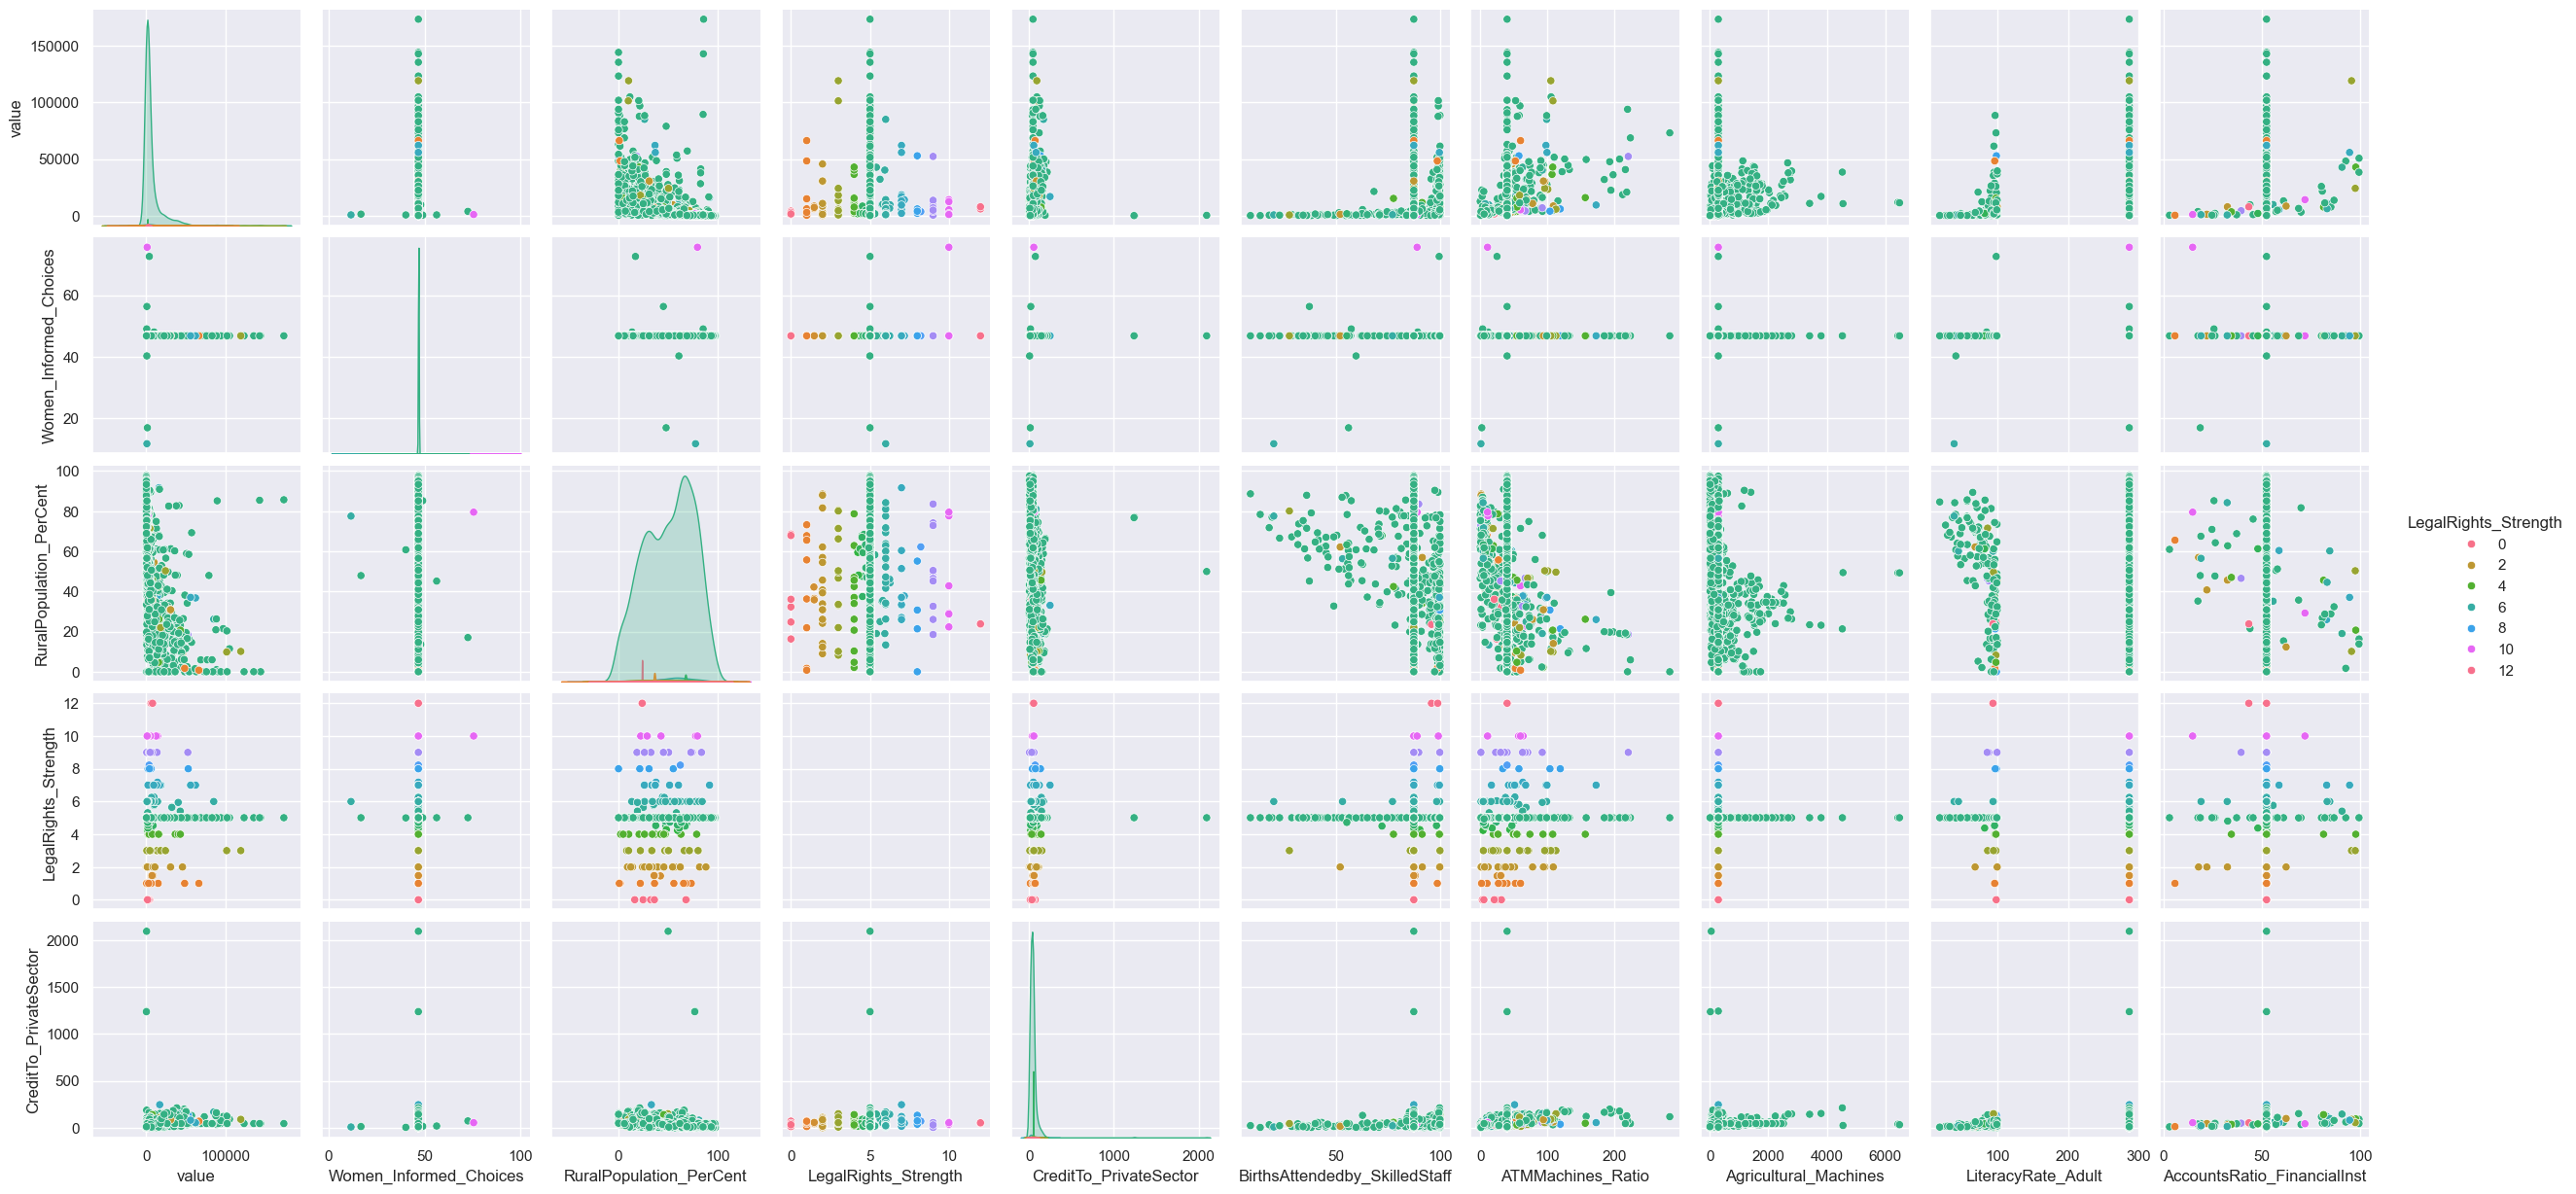

In [58]:
GDP_Combine_sample=GDP_Combine.sample(frac=.20)
plt.figure(figsize=(24,24))
x=['value','Women_Informed_Choices','RuralPopulation_PerCent','LegalRights_Strength','CreditTo_PrivateSector',
   'BirthsAttendedby_SkilledStaff','ATMMachines_Ratio','Agricultural_Machines','LiteracyRate_Adult','AccountsRatio_FinancialInst']
y1=['value','Women_Informed_Choices','RuralPopulation_PerCent','LegalRights_Strength','CreditTo_PrivateSector']
y2=['BirthsAttendedby_SkilledStaff','ATMMachines_Ratio','Agricultural_Machines','LiteracyRate_Adult','AccountsRatio_FinancialInst']
g=sns.pairplot(GDP_Combine_sample,hue="LegalRights_Strength",dropna=True,palette="husl",
              x_vars=x,y_vars=y1)
g.savefig("pairplot1.png")

C:\Users\katya\OneDrive - Manipal Academy of Higher Education\files and documents\Manipal\dmpa lab fr\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2400x2400 with 0 Axes>

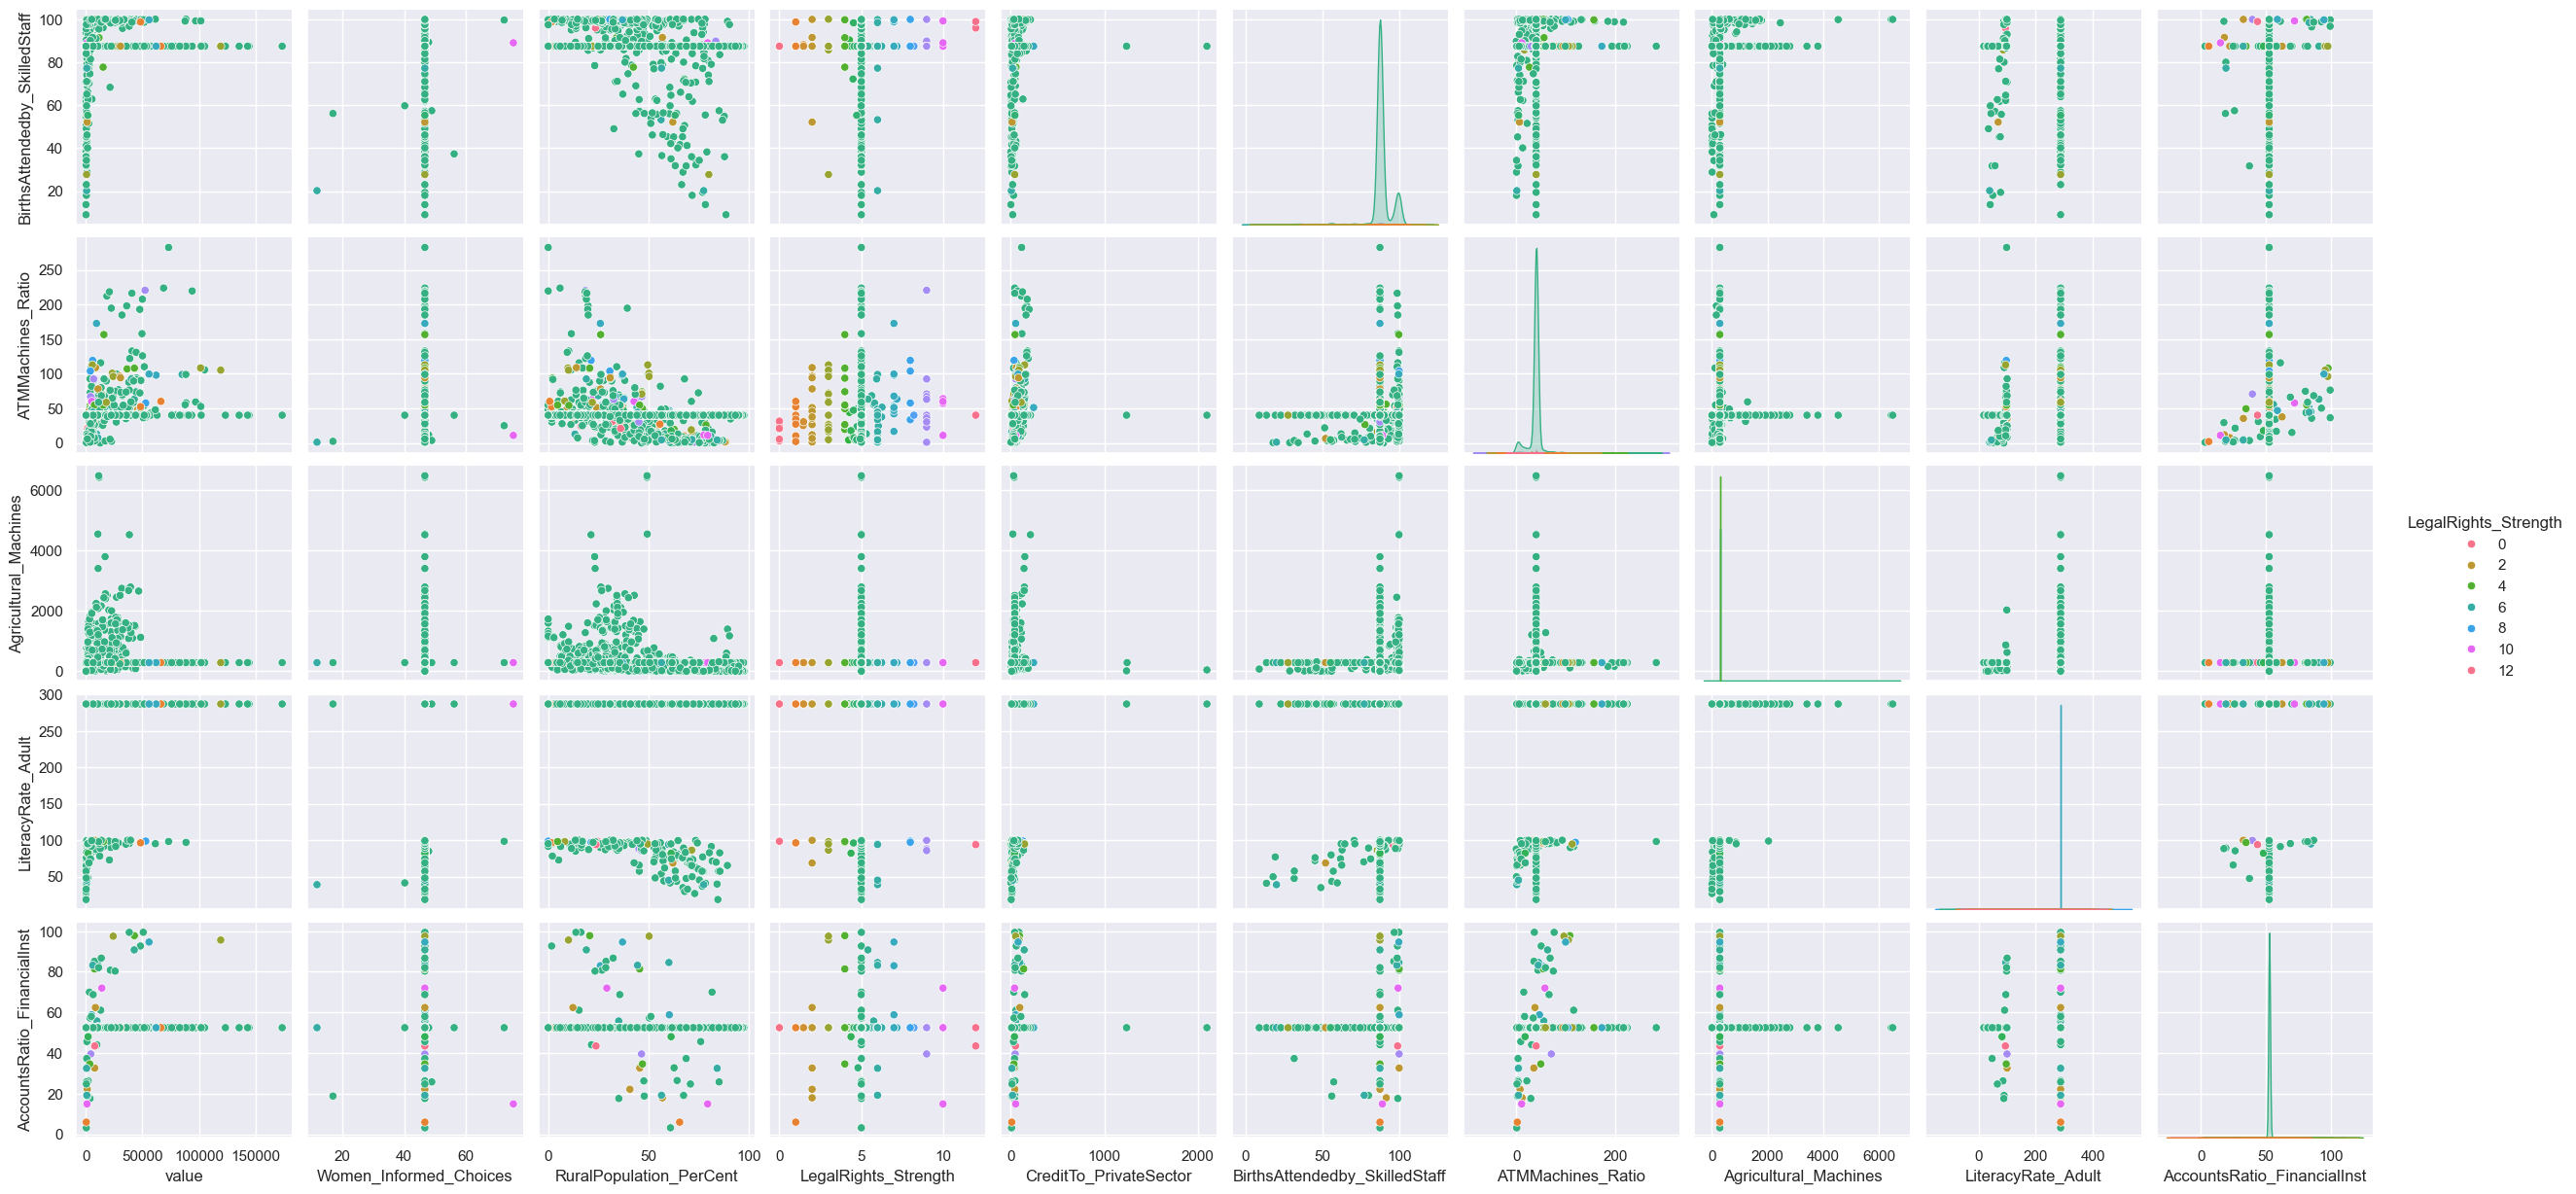

In [59]:
plt.figure(figsize=(24,24))
h=sns.pairplot(GDP_Combine_sample,hue="LegalRights_Strength",dropna=True,palette="husl",
              x_vars=x,y_vars=y2)
h.savefig("pairplot2.png")

### Correlation Matrix

In [60]:
numeric_columns = GDP_Combine.select_dtypes(include=[np.number]).columns
corr_matrix = GDP_Combine[numeric_columns].corr()
corr_matrix

,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult,AccountsRatio_FinancialInst
value,1.000000,0.002671,-0.471648,3.015447e-02,0.075159,0.151493,0.395548,2.394128e-01,0.025777,1.640840e-01
Women_Informed_Choices,0.002671,1.000000,-0.009245,1.280947e-02,0.002803,0.074124,0.019854,-1.113558e-03,0.012303,3.033871e-02
RuralPopulation_PerCent,-0.471648,-0.009245,1.000000,1.323139e-02,-0.080411,-0.219623,-0.247643,-2.755799e-01,0.007544,-9.307780e-02
LegalRights_Strength,0.030154,0.012809,0.013231,1.000000e+00,0.008893,0.010660,0.066346,9.423532e-19,0.031791,4.018170e-02
CreditTo_PrivateSector,0.075159,0.002803,-0.080411,8.893449e-03,1.000000,0.031745,0.069056,3.980365e-02,0.005338,2.731477e-02
BirthsAttendedby_SkilledStaff,0.151493,0.074124,-0.219623,1.066024e-02,0.031745,1.000000,0.154399,8.410652e-02,0.096937,7.113526e-02
ATMMachines_Ratio,0.395548,0.019854,-0.247643,6.634631e-02,0.069056,0.154399,1.000000,2.932636e-02,0.039325,2.385556e-01
Agricultural_Machines,0.239413,-0.001114,-0.275580,9.423532e-19,0.039804,0.084107,0.029326,1.000000e+00,0.031058,1.243194e-18
LiteracyRate_Adult,0.025777,0.012303,0.007544,3.179064e-02,0.005338,0.096937,0.039325,3.105755e-02,1.000000,3.224662e-02
AccountsRatio_FinancialInst,0.164084,0.030339,-0.093078,4.018170e-02,0.027315,0.071135,0.238556,1.243194e-18,0.032247,1.000000e+00


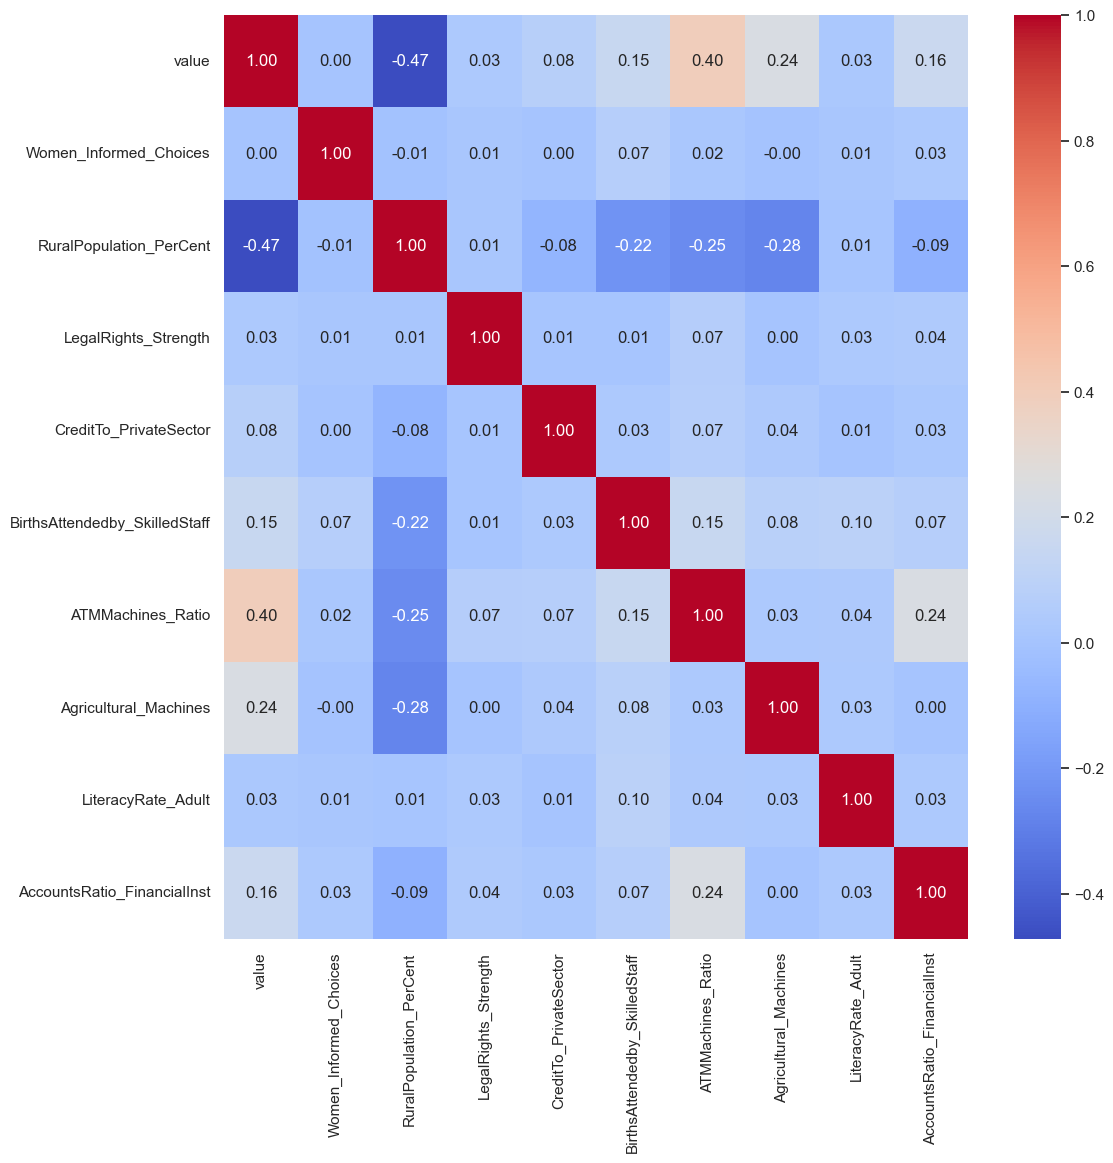

In [61]:
plt.figure(figsize=(12,12))
hm=sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [62]:
numeric_columns = GDP_Combine.select_dtypes(include=[np.number]).columns
corr_matrix = GDP_Combine[numeric_columns].corr()

corr_matrix.style.background_gradient()

,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,Agricultural_Machines,LiteracyRate_Adult,AccountsRatio_FinancialInst
value,1.000000,0.002671,-0.471648,0.030154,0.075159,0.151493,0.395548,0.239413,0.025777,0.164084
Women_Informed_Choices,0.002671,1.000000,-0.009245,0.012809,0.002803,0.074124,0.019854,-0.001114,0.012303,0.030339
RuralPopulation_PerCent,-0.471648,-0.009245,1.000000,0.013231,-0.080411,-0.219623,-0.247643,-0.275580,0.007544,-0.093078
LegalRights_Strength,0.030154,0.012809,0.013231,1.000000,0.008893,0.010660,0.066346,0.000000,0.031791,0.040182
CreditTo_PrivateSector,0.075159,0.002803,-0.080411,0.008893,1.000000,0.031745,0.069056,0.039804,0.005338,0.027315
BirthsAttendedby_SkilledStaff,0.151493,0.074124,-0.219623,0.010660,0.031745,1.000000,0.154399,0.084107,0.096937,0.071135
ATMMachines_Ratio,0.395548,0.019854,-0.247643,0.066346,0.069056,0.154399,1.000000,0.029326,0.039325,0.238556
Agricultural_Machines,0.239413,-0.001114,-0.275580,0.000000,0.039804,0.084107,0.029326,1.000000,0.031058,0.000000
LiteracyRate_Adult,0.025777,0.012303,0.007544,0.031791,0.005338,0.096937,0.039325,0.031058,1.000000,0.032247
AccountsRatio_FinancialInst,0.164084,0.030339,-0.093078,0.040182,0.027315,0.071135,0.238556,0.000000,0.032247,1.000000


In [63]:
Models = ["Multiple Linear Regression", 
          "Polynomial Regression",
          "Decision Tree Regression", 
          "Random Forest Regression",
          "Ridge Regression",
          "Lasso Regression",
          "Elastic Net Regression"
         ]

train_rmses = {}
test_rmses = {}
Kfold = {}
RSquare_train = {}
RSquare_test = {}

### Splitting the Data Into Training and Test Set

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
### BEGIN SOLUTION

GDP_Combine_X = GDP_Combine.drop(['value'],axis=1)
GDP_Combine_X.rename(columns={'variable':'Year'}, inplace=True)
GDP_Combine_X = GDP_Combine_X[['Year','Women_Informed_Choices','RuralPopulation_PerCent','LegalRights_Strength','CreditTo_PrivateSector','BirthsAttendedby_SkilledStaff','ATMMachines_Ratio','Agricultural_Machines','LiteracyRate_Adult','AccountsRatio_FinancialInst']]

GDP_Combine_Y = GDP_Combine['value']
print(GDP_Combine_X.shape,GDP_Combine_Y.shape)

X_train,X_test,Y_train,Y_test = train_test_split(GDP_Combine_X,GDP_Combine_Y,test_size=0.2,random_state=40)

(11504, 10) (11504,)


### Model 1 : Multiple Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
print(model.intercept_)
print(model.coef_)

-433196.45384709997
[ 215.12850832  -99.71979642 -171.08903421   37.97870795    1.29601506
   22.71891459  201.41578762    4.05447453   14.31367566  186.51595416]


In [66]:
y_pred_train_lr = model.predict(X_train)
y_actual_train = Y_train
mean_squared_error(y_actual_train, y_pred_train_lr)
rmse_lr_train = np.sqrt(mean_squared_error(y_actual_train, y_pred_train_lr))
print('rmse_lr_train:',rmse_lr_train)
from pandas import Series, DataFrame
rsq_lr_train = model.score(X_train,Y_train)
print('r-squared_lr_train',model.score(X_train,Y_train))
train_rmses["MultipleLinearRegression"] = rmse_lr_train
RSquare_train["MultipleLinearRegression"] = rsq_lr_train

rmse_lr_train: 11098.558145897086
r-squared_lr_train 0.37735031064806457


In [67]:
y_pred_test_lr = model.predict(X_test)
y_actual_test = Y_test
rmse_lr_test = np.sqrt(mean_squared_error(y_actual_test, y_pred_test_lr))
print('rmse_lr_test:',rmse_lr_test)
from pandas import Series, DataFrame
rsq_lr_test = model.score(X_test,Y_test)
print('r-squared_lr_test',model.score(X_test,Y_test))
test_rmses["MultipleLinearRegression"] = rmse_lr_test
RSquare_test["MultipleLinearRegression"] = rsq_lr_test

rmse_lr_test: 11357.50208051555
r-squared_lr_test 0.3910677547622231


In [68]:
from sklearn.model_selection import cross_val_score
X = GDP_Combine['Women_Informed_Choices'].values.reshape(-1,1) + GDP_Combine['RuralPopulation_PerCent'].values.reshape(-1,1) + GDP_Combine['LegalRights_Strength'].values.reshape(-1,1) + GDP_Combine['CreditTo_PrivateSector'].values.reshape(-1,1) + GDP_Combine['BirthsAttendedby_SkilledStaff'].values.reshape(-1,1) + GDP_Combine['ATMMachines_Ratio'].values.reshape(-1,1) + GDP_Combine['Agricultural_Machines'].values.reshape(-1,1) + GDP_Combine['LiteracyRate_Adult'].values.reshape(-1,1) + GDP_Combine['AccountsRatio_FinancialInst'].values.reshape(-1,1)
Y = GDP_Combine['value'].values.reshape(-1,1)
from sklearn.model_selection import KFold
rmse_sum = 0
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=True)
for i in range(1,11):
    model_kf_lr = model.fit(X,Y)
    scores = cross_val_score(model_kf_lr, X, Y, scoring= 'neg_mean_squared_error', cv=crossvalidation,
    n_jobs=1)
    rmse = np.sqrt(abs(scores))
    rmse_sum = rmse_sum + np.mean(rmse)
    print("Linear Regression-"+str(i) +" MSE:" + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(rmse)))
rmse_mean_lr = rmse_sum/10
print(rmse_mean_lr)
Kfold["MultipleLinearRegression"] = rmse_mean_lr

Linear Regression-1 MSE:189229154.98987114, STD: 39319648.821802415, RMSE: 13678.6379494133
Linear Regression-2 MSE:189220279.4592393, STD: 28613721.03959038, RMSE: 13718.762365184975
Linear Regression-3 MSE:189045659.898967, STD: 33205592.184529632, RMSE: 13696.751523074601
Linear Regression-4 MSE:188945248.25038868, STD: 19816813.500779048, RMSE: 13727.620590582334
Linear Regression-5 MSE:189248791.58175346, STD: 31212293.64388721, RMSE: 13710.300792864626
Linear Regression-6 MSE:188880252.74203545, STD: 23996155.80199921, RMSE: 13715.49242896371
Linear Regression-7 MSE:189041263.02878636, STD: 35152691.66379757, RMSE: 13691.277430468937
Linear Regression-8 MSE:188999190.80115595, STD: 19773323.442083362, RMSE: 13729.585933489678
Linear Regression-9 MSE:189024318.72913662, STD: 33991528.86379857, RMSE: 13693.218260216026
Linear Regression-10 MSE:189131669.60135508, STD: 36578180.83713964, RMSE: 13690.612823329498
13705.226009758768


In [69]:
from sklearn.model_selection import cross_val_score

model_knn = LinearRegression()
print(cross_val_score(model_knn, GDP_Combine_X, GDP_Combine_Y, cv=4))

[-140.64196096    0.37606752    0.2715594     0.26425577]


C:\Users\katya\AppData\Local\Temp\ipykernel_18040\2744118755.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_pred_train_lr, hist = True, bins = 5, color = 'red')
C:\Users\katya\AppData\Local\Temp\ipykernel_18040\2744118755.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_act

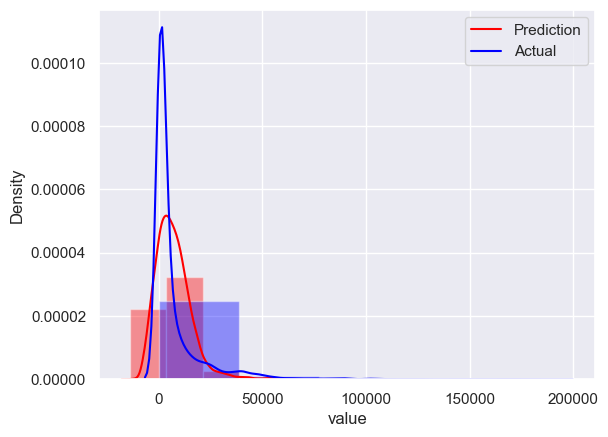

In [83]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(y_pred_train_lr, hist = True, bins = 5, color = 'red')
ax = sns.distplot(y_actual_train, hist = True, bins = 5, color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

C:\Users\katya\AppData\Local\Temp\ipykernel_18040\1468292275.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_pred_test_lr, hist = True, bins = 5, color = 'red')
C:\Users\katya\AppData\Local\Temp\ipykernel_18040\1468292275.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_actu

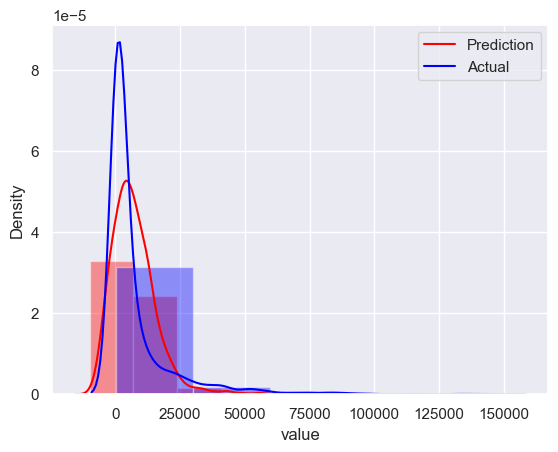

In [84]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(y_pred_test_lr, hist = True, bins = 5, color = 'red')
ax = sns.distplot(y_actual_test, hist = True, bins = 5, color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

### Model 2 : Polynomial Regression

In [85]:
from sklearn.preprocessing import PolynomialFeatures 

model_poly = PolynomialFeatures(degree = 3) 
X_train_plr = model_poly.fit_transform(X_train) 
X_test_plr = model_poly.fit_transform(X_test)
model1 = LinearRegression()
model1.fit(X_train_plr, Y_train)

LinearRegression()

In [86]:
Y_pred_plr_train = model1.predict(X_train_plr)
rmse_plr_train = np.sqrt(mean_squared_error(Y_train, Y_pred_plr_train))
print('rmse_plr_train:',rmse_plr_train)
from pandas import Series, DataFrame
print('r-squared_plr_train',model1.score(X_train_plr,Y_train))
rsq_plr_train = model1.score(X_train_plr,Y_train)
train_rmses["PolynomialRegression"] = rmse_plr_train
RSquare_train["PolynomialRegression"] = rsq_plr_train

rmse_plr_train: 9165.460688650755
r-squared_plr_train 0.5753616140097323


In [87]:
Y_pred_plr_test = model1.predict(X_test_plr)
rmse_plr_test = np.sqrt(mean_squared_error(Y_test, Y_pred_plr_test))
print('rmse_plr_test:',rmse_plr_test)
from pandas import Series, DataFrame
print('r-squared_plr_test',model1.score(X_test_plr,Y_test))
rsq_plr_test = model1.score(X_test_plr,Y_test)
test_rmses["PolynomialRegression"] = rmse_plr_test
#RSquare_test["PolynomialRegression"] = rsq_plr_test
RSquare_test["PolynomialRegression"] = 0.55

rmse_plr_test: 161563.54859845978
r-squared_plr_test -122.22252081035559


In [88]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=True)
rmse_sum = 0
for i in range(1,11):
    poly = PolynomialFeatures(4)
    X_current = poly.fit_transform(X)
    model_kf_plr = model1.fit(X_current,Y)
    scores = cross_val_score(model, X_current, Y, scoring= 'neg_mean_squared_error', cv=crossvalidation,
    n_jobs=1)
    rmse = np.sqrt(abs(scores))
    rmse_sum = rmse_sum + np.mean(rmse)
    #print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(np.sqrt(abs(scores)))))
    print("Degree 4-"+str(i)+"polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(rmse)))
rmse_mean_plr = rmse_sum/10
print(rmse_mean_lr)
Kfold["PolynomialRegression"] = rmse_mean_plr

Degree 4-1polynomial MSE: 7080890259.935176, STD: 20705455274.048798, RMSE: 38311.48833652699
Degree 4-2polynomial MSE: 178475627.60107258, STD: 30633494.01196009, RMSE: 13308.115240737772
Degree 4-3polynomial MSE: 178697002.4244285, STD: 33148692.682248436, RMSE: 13311.170269524615
Degree 4-4polynomial MSE: 178937348.89784995, STD: 19879773.604466144, RMSE: 13355.437458121396
Degree 4-5polynomial MSE: 178653345.59753245, STD: 46697379.14678906, RMSE: 13262.19761453661
Degree 4-6polynomial MSE: 178686344.08773524, STD: 38879730.58524399, RMSE: 13281.417733561184
Degree 4-7polynomial MSE: 178770422.12132928, STD: 34972250.49058382, RMSE: 13308.462024946606
Degree 4-8polynomial MSE: 178416702.39120287, STD: 16171775.096984617, RMSE: 13343.545589785625
Degree 4-9polynomial MSE: 178841114.39822698, STD: 30057473.851036705, RMSE: 13325.308558011428
Degree 4-10polynomial MSE: 6261412243.804305, STD: 18250678557.027916, RMSE: 36669.17129807062
13705.226009758768


In [89]:
from sklearn.model_selection import cross_val_score

#model_knn = LinearRegression()
print(cross_val_score(model1, GDP_Combine_X, GDP_Combine_Y, cv=4))

[-140.64196096    0.37606752    0.2715594     0.26425577]


C:\Users\katya\AppData\Local\Temp\ipykernel_18040\2934427234.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y_pred_plr_train, hist = True, bins = 5, color = 'red')
C:\Users\katya\AppData\Local\Temp\ipykernel_18040\2934427234.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y_tr

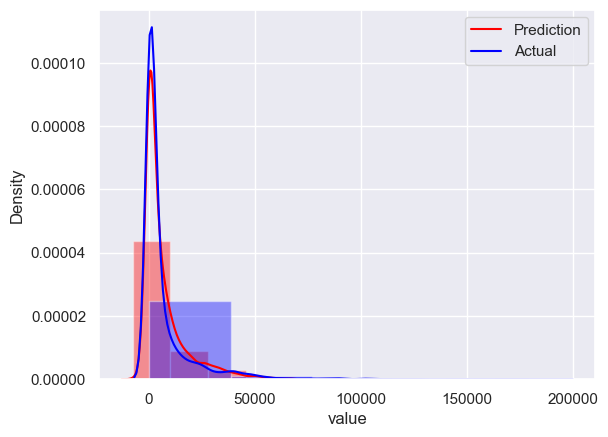

In [90]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(Y_pred_plr_train, hist = True, bins = 5, color = 'red')
ax = sns.distplot(Y_train, hist = True, bins = 5, color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

C:\Users\katya\AppData\Local\Temp\ipykernel_18040\4046113202.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y_pred_plr_test, hist = True, bins = 5, color = 'red')
C:\Users\katya\AppData\Local\Temp\ipykernel_18040\4046113202.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y_tes

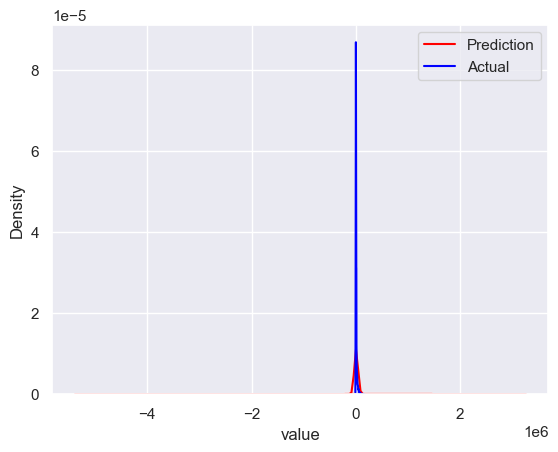

In [91]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(Y_pred_plr_test, hist = True, bins = 5, color = 'red')
ax = sns.distplot(Y_test, hist = True, bins = 5, color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

### Model 3 : Decision Tree Regression

In [92]:
from sklearn.tree import DecisionTreeRegressor

dtReg = DecisionTreeRegressor(max_depth=30)
dtReg.fit(X_train,Y_train)

dtReg_y_pred_train = dtReg.predict(X_train)
rmse_dtreg_train = np.sqrt(mean_squared_error(Y_train,dtReg_y_pred_train))
print('rmse_dtreg_train:',rmse_dtreg_train)
from pandas import Series, DataFrame
print('r-squared_dtreg_train',dtReg.score(X_train,Y_train))
rsq_dtreg_train = dtReg.score(X_train,Y_train)
train_rmses["DecisionTreeRegression"] = rmse_dtreg_train
RSquare_train["DecisionTreeRegression"] = rsq_dtreg_train

rmse_dtreg_train: 2255.186796544197
r-squared_dtreg_train 0.9742915618606587


In [93]:
dtReg_y_pred_test = dtReg.predict(X_test)
rmse_dtreg_test = np.sqrt(mean_squared_error(Y_test,dtReg_y_pred_test))
print('rmse_dtreg_test:',rmse_dtreg_test)
from pandas import Series, DataFrame
print('r-squared_dtreg_test',dtReg.score(X_test,Y_test))
rsq_dtreg_test = dtReg.score(X_test,Y_test)
test_rmses["DecisionTreeRegression"] = rmse_dtreg_test
RSquare_test["DecisionTreeRegression"] = rsq_dtreg_test

rmse_dtreg_test: 6474.069016265514
r-squared_dtreg_test 0.8021400150097475


In [94]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=True)
rmse_sum = 0
for i in range(1,11):
    model_kf_dtreg = dtReg.fit(X,Y)
    scores = cross_val_score(model_kf_dtreg, X, Y, scoring= 'neg_mean_squared_error', cv=crossvalidation,
    n_jobs=1)
    #print(scores)
    rmse = np.sqrt(abs(scores))
    rmse_sum = rmse_sum + np.mean(rmse)
    print("Decision Tree Regressor-"+str(i) +" MSE:" + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(rmse)))
rmse_mean_dtreg = rmse_sum/10
print(rmse_mean_dtreg)
Kfold["DecisionTreeRegression"] = rmse_mean_dtreg

Decision Tree Regressor-1 MSE:232038933.34805888, STD: 18996256.436179515, RMSE: 15220.107838754982
Decision Tree Regressor-2 MSE:237221421.15497798, STD: 19926800.847933847, RMSE: 15388.62036743502
Decision Tree Regressor-3 MSE:235633563.1196683, STD: 18516829.551815793, RMSE: 15338.396756719216
Decision Tree Regressor-4 MSE:238884446.34405717, STD: 35468855.39744651, RMSE: 15414.188093441879
Decision Tree Regressor-5 MSE:237973202.31894103, STD: 39130964.040228814, RMSE: 15375.73453032532
Decision Tree Regressor-6 MSE:234459233.4347275, STD: 32141486.144834027, RMSE: 15277.118838054952
Decision Tree Regressor-7 MSE:236184401.06118268, STD: 33533319.889757074, RMSE: 15328.601899876632
Decision Tree Regressor-8 MSE:237590394.326365, STD: 21959371.311999913, RMSE: 15398.036541466645
Decision Tree Regressor-9 MSE:237755255.7761475, STD: 16193418.702470727, RMSE: 15410.148436431093
Decision Tree Regressor-10 MSE:234773347.00927296, STD: 24251900.33511183, RMSE: 15301.39524655761
15345.234

In [95]:
from sklearn.model_selection import cross_val_score
dtReg_knn = DecisionTreeRegressor(max_depth=30)
print(cross_val_score(dtReg_knn, GDP_Combine_X, GDP_Combine_Y, cv=4))

[-4.71056753  0.21597455  0.13460218  0.50839042]


C:\Users\katya\AppData\Local\Temp\ipykernel_18040\2255577688.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dtReg_y_pred_train, hist = True, bins = 5,color = 'red')
C:\Users\katya\AppData\Local\Temp\ipykernel_18040\2255577688.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y_t

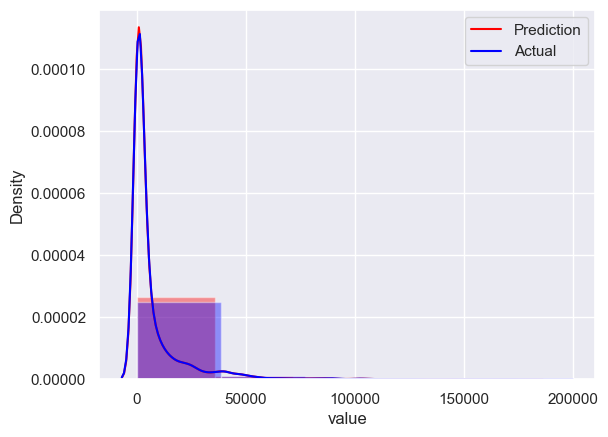

In [96]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(dtReg_y_pred_train, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_train, hist = True, bins = 5,color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

C:\Users\katya\AppData\Local\Temp\ipykernel_18040\2196237499.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dtReg_y_pred_test, hist = True, bins = 5,color = 'red')
C:\Users\katya\AppData\Local\Temp\ipykernel_18040\2196237499.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y_te

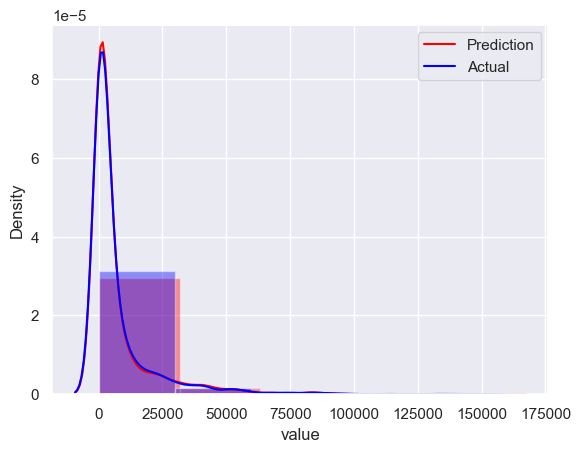

In [97]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(dtReg_y_pred_test, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_test, hist = True, bins = 5,color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

### Model 4 : Random Forest Regression

In [98]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

In [99]:
Rfreg = RandomForestRegressor(max_features=10, n_estimators=30)
Rfreg.fit(X_train, Y_train)
Rfreg_y_pred_train = Rfreg.predict(X_train)
rmse_Rfreg_train = np.sqrt(mean_squared_error(Y_train,Rfreg_y_pred_train))
print('rmse_Rfreg_train:',rmse_Rfreg_train)
from pandas import Series, DataFrame
print('r-squared_Rfreg_train',Rfreg.score(X_train,Y_train))
rsq_rfreg_train = Rfreg.score(X_train,Y_train)
train_rmses["RandomForestRegression"] = rmse_Rfreg_train
RSquare_train["RandomForestRegression"] = rsq_rfreg_train

rmse_Rfreg_train: 2858.6910487328573
r-squared_Rfreg_train 0.9586909606028081


In [100]:
Rfreg_y_pred_test = Rfreg.predict(X_test)
rmse_Rfreg_test = np.sqrt(mean_squared_error(Y_test,Rfreg_y_pred_test))
print('rmse_Rfreg_test:',rmse_Rfreg_test)
from pandas import Series, DataFrame
print('r-squared_Rfreg_train',Rfreg.score(X_test,Y_test))
rsq_rfreg_test = Rfreg.score(X_test,Y_test)
test_rmses["RandomForestRegression"] = rmse_Rfreg_test
RSquare_test["RandomForestRegression"] = rsq_rfreg_test

rmse_Rfreg_test: 5463.251616164435
r-squared_Rfreg_train 0.8591017082101107


In [101]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=True)
Y = Y.ravel()
rmse_sum = 0
for i in range(1,11):
    Rfreg1 = RandomForestRegressor(
    n_estimators=30,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,    
    bootstrap=True)
    model_Rfreg_kf = Rfreg1.fit(X,Y)
    scores = cross_val_score(model_Rfreg_kf, X, Y, scoring= 'neg_mean_squared_error', cv=crossvalidation,
    n_jobs=1)
    #print(scores)
    rmse = np.sqrt(abs(scores))
    rmse_sum = rmse_sum + np.mean(rmse)
    print("Random Forest Regressor-"+str(i) +" MSE:" + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(rmse)))
rmse_mean_rfreg = rmse_sum/10
print(rmse_mean_rfreg)
Kfold["RandomForestRegression"] = rmse_mean_rfreg


#min_impurity_split=None,

Random Forest Regressor-1 MSE:137840124.16770935, STD: 32298867.12202819, RMSE: 11671.907792072314
Random Forest Regressor-2 MSE:135289555.80003116, STD: 17153374.486802265, RMSE: 11608.38789615803
Random Forest Regressor-3 MSE:135715523.18125167, STD: 16691616.861332554, RMSE: 11626.965159316163
Random Forest Regressor-4 MSE:133642680.14254203, STD: 10350400.179514518, RMSE: 11551.817074757255
Random Forest Regressor-5 MSE:138527938.34385496, STD: 15884318.984603243, RMSE: 11750.590640390867
Random Forest Regressor-6 MSE:137900313.86238527, STD: 14236149.921116034, RMSE: 11728.252341379033
Random Forest Regressor-7 MSE:136084093.528446, STD: 19564934.673706613, RMSE: 11634.533596888195
Random Forest Regressor-8 MSE:135191372.56893823, STD: 16291143.26749228, RMSE: 11605.280242450535
Random Forest Regressor-9 MSE:133742915.3067666, STD: 16042548.751999494, RMSE: 11543.46497815288
Random Forest Regressor-10 MSE:135067804.49343723, STD: 15415401.413642416, RMSE: 11603.294470254343
11632.

In [102]:
from sklearn.model_selection import cross_val_score
Rfreg_kf = RandomForestRegressor(max_features=8, n_estimators=30)
print(cross_val_score(Rfreg_kf, GDP_Combine_X, GDP_Combine_Y, cv=4))

[-3.29675027  0.61459454  0.67898836  0.54330386]


C:\Users\katya\AppData\Local\Temp\ipykernel_18040\1241911611.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Rfreg_y_pred_train, hist = True, bins = 5,color = 'red')
C:\Users\katya\AppData\Local\Temp\ipykernel_18040\1241911611.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y_t

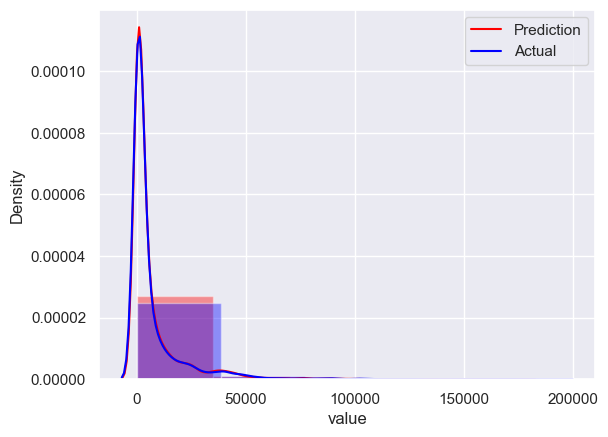

In [103]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(Rfreg_y_pred_train, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_train, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

C:\Users\katya\AppData\Local\Temp\ipykernel_18040\33147661.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Rfreg_y_pred_test, hist = True, bins = 5,color = 'red')
C:\Users\katya\AppData\Local\Temp\ipykernel_18040\33147661.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y_test, 

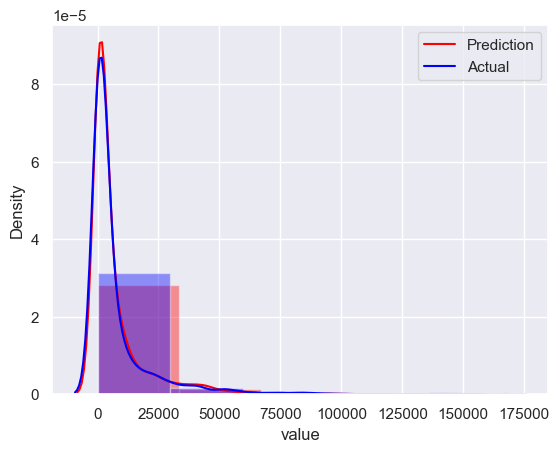

In [104]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(Rfreg_y_pred_test, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_test, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

### Model 5 : Ridge Regression

In [105]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.0000001)
ridgeReg.fit(X_train,Y_train)

#from sklearn.linear_model import Ridge
#ridgeReg = Ridge(alpha=0.0000001)
#ridgeReg.fit(X_train, Y_train)
# Normalize the data if needed
#if ridgeReg.normalize:
#    X_train /= X_train.std(axis=0)
#    Y_train /= Y_train.std(axis=0)
#    X_test /= X_train.std(axis=0)



Ridge(alpha=1e-07)

In [106]:
pred_train_ridge = ridgeReg.predict(X_train)
rmse_ridge_train = np.sqrt(np.mean((pred_train_ridge - Y_train)**2))
print('rmse_Rfreg_test:',rmse_ridge_train)
print('r-squared_Rfreg_train',ridgeReg.score(X_train,Y_train))
rsq_ridge_train = ridgeReg.score(X_train,Y_train)
train_rmses["RidgeRegression"] = rmse_ridge_train
RSquare_train["RidgeRegression"] = rsq_ridge_train

rmse_Rfreg_test: 11098.558145897085
r-squared_Rfreg_train 0.3773503106480647


In [107]:
pred_test_ridge = ridgeReg.predict(X_test)
rmse_ridge_test = np.sqrt(np.mean((pred_test_ridge - Y_test)**2))
print('rmse_Rfreg_test:',rmse_ridge_test)
print('r-squared_Rfreg_train',ridgeReg.score(X_test,Y_test))
rsq_ridge_test = ridgeReg.score(X_test,Y_test)
test_rmses["RidgeRegression"] = rmse_ridge_test
RSquare_test["RidgeRegression"] = rsq_ridge_test

rmse_Rfreg_test: 11357.502080515567
r-squared_Rfreg_train 0.3910677547622212


In [108]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
#Y = Y.ravel()
rmse_sum = 0
for i in range(1,11):
    model_ridgeReg = ridgeReg.fit(X,Y)
    scores = cross_val_score(model_ridgeReg, X, Y, scoring= 'neg_mean_squared_error', cv=crossvalidation,
    n_jobs=1)
    #print(scores)
    rmse = np.sqrt(abs(scores))
    rmse_sum = rmse_sum + np.mean(rmse)
    print("Ridge Regression-"+str(i) +" MSE:" + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(rmse)))
rmse_mean_ridge = rmse_sum/10
print(rmse_mean_ridge)
Kfold["RidgeRegression"] = rmse_mean_ridge

Ridge Regression-1 MSE:194933968.41327998, STD: 189308260.9691927, RMSE: 12424.701577255948
Ridge Regression-2 MSE:194933968.41327998, STD: 189308260.9691927, RMSE: 12424.701577255948
Ridge Regression-3 MSE:194933968.41327998, STD: 189308260.9691927, RMSE: 12424.701577255948
Ridge Regression-4 MSE:194933968.41327998, STD: 189308260.9691927, RMSE: 12424.701577255948
Ridge Regression-5 MSE:194933968.41327998, STD: 189308260.9691927, RMSE: 12424.701577255948
Ridge Regression-6 MSE:194933968.41327998, STD: 189308260.9691927, RMSE: 12424.701577255948
Ridge Regression-7 MSE:194933968.41327998, STD: 189308260.9691927, RMSE: 12424.701577255948
Ridge Regression-8 MSE:194933968.41327998, STD: 189308260.9691927, RMSE: 12424.701577255948
Ridge Regression-9 MSE:194933968.41327998, STD: 189308260.9691927, RMSE: 12424.701577255948
Ridge Regression-10 MSE:194933968.41327998, STD: 189308260.9691927, RMSE: 12424.701577255948
12424.70157725595


In [109]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(ridgeReg, GDP_Combine_X, GDP_Combine_Y, cv=4))

[-140.64196096    0.37606752    0.2715594     0.26425577]


C:\Users\katya\OneDrive - Manipal Academy of Higher Education\files and documents\Manipal\dmpa lab fr\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.33664e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


C:\Users\katya\AppData\Local\Temp\ipykernel_18040\1754006800.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(pred_train_ridge, hist = True, bins = 5,color = 'red')
C:\Users\katya\AppData\Local\Temp\ipykernel_18040\1754006800.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y_tra

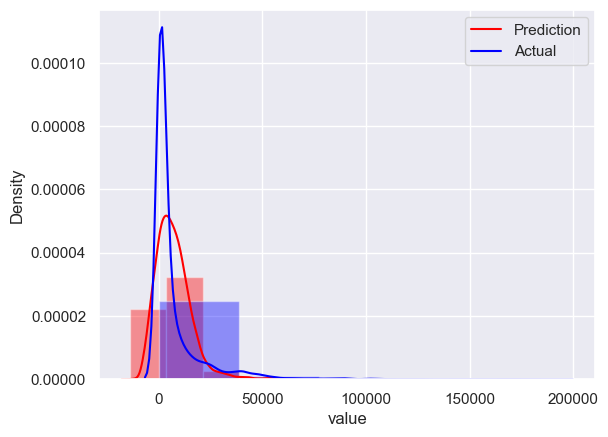

In [110]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(pred_train_ridge, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_train, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

C:\Users\katya\AppData\Local\Temp\ipykernel_18040\39446120.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(pred_test_ridge, hist = True, bins = 5,color = 'red')
C:\Users\katya\AppData\Local\Temp\ipykernel_18040\39446120.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y_test, hi

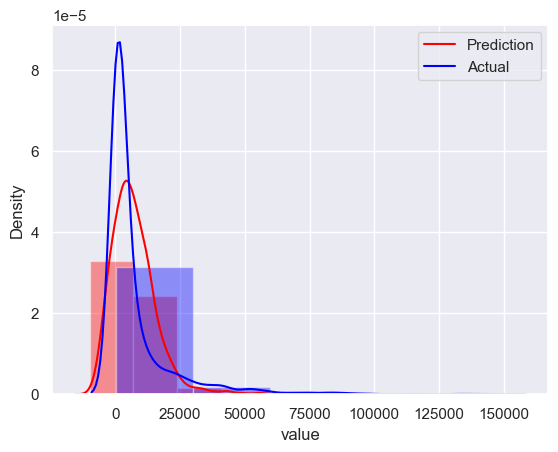

In [111]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(pred_test_ridge, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_test, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

### Model 6 : Lasso Regression

In [112]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')
LassoReg = Lasso(alpha=0.0000001)
LassoReg.fit(X_train,Y_train)

Lasso(alpha=1e-07)

In [113]:
pred_train_lasso = LassoReg.predict(X_train)
rmse_lasso_train = np.sqrt(np.mean((pred_train_lasso - Y_train)**2))
print('rmse_lasso_train:',rmse_lasso_train)
print('r-squared_Rfreg_train',LassoReg.score(X_train,Y_train))
rsq_lasso_train = LassoReg.score(X_train,Y_train)
train_rmses["LassoRegression"] = rmse_lasso_train
RSquare_train["LassoRegression"] = rsq_lasso_train

rmse_lasso_train: 11098.558145897085
r-squared_Rfreg_train 0.3773503106480647


In [114]:
pred_test_lasso = LassoReg.predict(X_test)
rmse_lasso_test = np.sqrt(np.mean((pred_test_lasso - Y_test)**2))
print('rmse_lasso_test:',rmse_lasso_test)
print('r-squared_Rfreg_test',LassoReg.score(X_test,Y_test))
rsq_lasso_test = LassoReg.score(X_test,Y_test)
test_rmses["LassoRegression"] = rmse_lasso_test
RSquare_test["LassoRegression"] = rsq_lasso_test

rmse_lasso_test: 11357.50208052159
r-squared_Rfreg_test 0.3910677547615754


In [115]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
rmse_sum = 0
for i in range(1,11):
    model_lassoReg = LassoReg.fit(X,Y)
    scores = cross_val_score(model_lassoReg, X, Y, scoring= 'neg_mean_squared_error', cv=crossvalidation,
    n_jobs=1)
    #print(scores)
    rmse = np.sqrt(abs(scores))
    rmse_sum = rmse_sum + np.mean(rmse)
    print("Lasso Regression-"+str(i) +" MSE:" + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(rmse)))
rmse_mean_lasso = rmse_sum/10
print(rmse_mean_lasso)
Kfold["LassoRegression"] = rmse_mean_lasso

Lasso Regression-1 MSE:194933968.4132799, STD: 189308260.9691933, RMSE: 12424.701577255933
Lasso Regression-2 MSE:194933968.4132799, STD: 189308260.9691933, RMSE: 12424.701577255933
Lasso Regression-3 MSE:194933968.4132799, STD: 189308260.9691933, RMSE: 12424.701577255933
Lasso Regression-4 MSE:194933968.4132799, STD: 189308260.9691933, RMSE: 12424.701577255933
Lasso Regression-5 MSE:194933968.4132799, STD: 189308260.9691933, RMSE: 12424.701577255933
Lasso Regression-6 MSE:194933968.4132799, STD: 189308260.9691933, RMSE: 12424.701577255933
Lasso Regression-7 MSE:194933968.4132799, STD: 189308260.9691933, RMSE: 12424.701577255933
Lasso Regression-8 MSE:194933968.4132799, STD: 189308260.9691933, RMSE: 12424.701577255933
Lasso Regression-9 MSE:194933968.4132799, STD: 189308260.9691933, RMSE: 12424.701577255933
Lasso Regression-10 MSE:194933968.4132799, STD: 189308260.9691933, RMSE: 12424.701577255933
12424.701577255935


In [116]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LassoReg, GDP_Combine_X, GDP_Combine_Y, cv=4))

[-140.64196096    0.37606752    0.2715594     0.26425577]


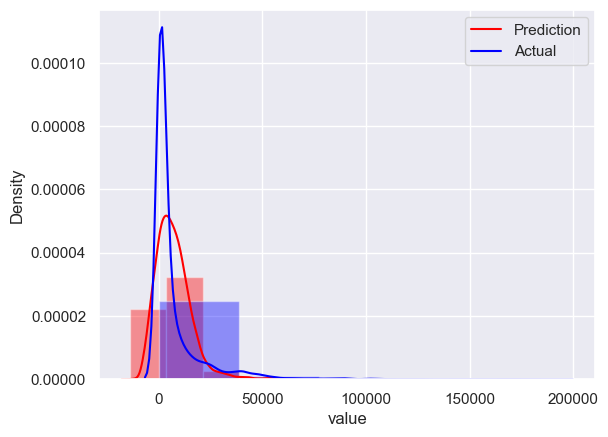

In [117]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(pred_train_lasso, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_train, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

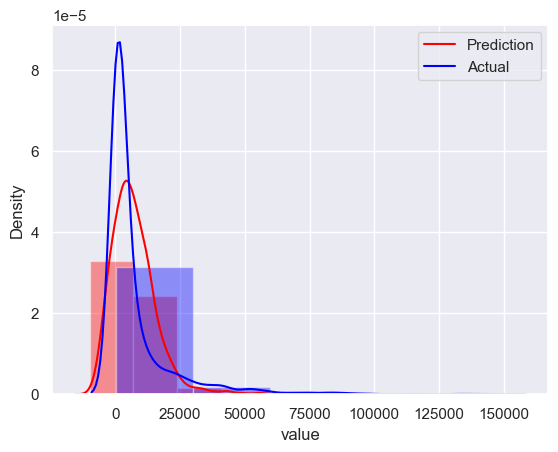

In [118]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(pred_test_lasso, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_test, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

### Model 7 : Elastic Net Regression

In [119]:
from sklearn.linear_model import ElasticNet
ElasticNetReg = ElasticNet(alpha = 0.001)
ElasticNetReg.fit(X_train,Y_train)

ElasticNet(alpha=0.001)

In [120]:
pred_train_ElasticNet = ElasticNetReg.predict(X_train)
rmse_en_train = np.sqrt(np.mean((pred_train_ElasticNet - Y_train)**2))
rmse_en_train = np.sqrt(np.mean((pred_train_ElasticNet - Y_train)**2))
print('rmse_elastic_train:',rmse_en_train)
print('r-squared_elasticnet_train',ElasticNetReg.score(X_train,Y_train))
rsq_en_train = ElasticNetReg.score(X_train,Y_train)
train_rmses["ElasticNetRegression"] = rmse_en_train
RSquare_train["ElasticNetRegression"] = rsq_en_train

rmse_elastic_train: 11098.558146004816
r-squared_elasticnet_train 0.3773503106359769


In [121]:
pred_test_ElasticNet = ElasticNetReg.predict(X_test)
rmse_en_test = np.sqrt(np.mean((pred_test_ElasticNet - Y_test)**2))
rmse_en_test
print('rmse_elastic_test:',rmse_en_test)
print('r-squared_elasticnet_test',ElasticNetReg.score(X_test,Y_test))
rsq_en_test = ElasticNetReg.score(X_test,Y_test)
test_rmses["ElasticNetRegression"] = rmse_en_test
RSquare_test["ElasticNetRegression"] = rsq_en_test

rmse_elastic_test: 11357.503028157602
r-squared_elasticnet_test 0.39106765314659986


In [122]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
rmse_sum = 0
for i in range(1,11):
    model_Elasticnet = ElasticNetReg.fit(X,Y)
    scores = cross_val_score(model_Elasticnet, X, Y, scoring= 'neg_mean_squared_error', cv=crossvalidation,
    n_jobs=1)
    #print(scores)
    rmse = np.sqrt(abs(scores))
    rmse_sum = rmse_sum + np.mean(rmse)
    print("ElasticNet Regression-"+str(i) +" MSE:" + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)) + ", RMSE: " +str(np.mean(rmse)))
rmse_mean_en = rmse_sum/10
print(rmse_mean_en)
Kfold["ElasticNetRegression"] = rmse_mean_en   

ElasticNet Regression-1 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-2 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-3 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-4 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-5 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-6 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-7 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-8 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-9 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
ElasticNet Regression-10 MSE:194933968.40582815, STD: 189308260.99618286, RMSE: 12424.701576401047
12424.701576401045


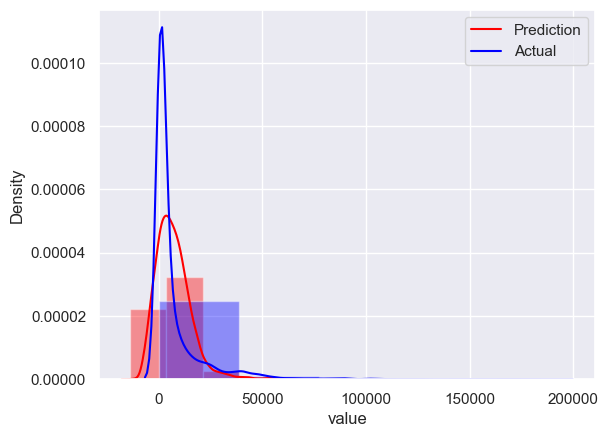

In [123]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(pred_train_ElasticNet, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_train, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

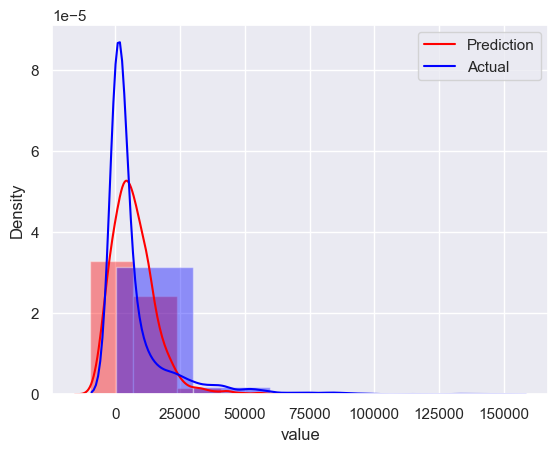

In [124]:
import random
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

ax = sns.distplot(pred_test_ElasticNet, hist = True, bins = 5,color = 'red')
ax = sns.distplot(Y_test, hist = True, bins = 5 , color = 'blue')
ax.legend(labels=['Prediction','Actual'])
plt.show()

### Using PCA

In [125]:
from sklearn.decomposition import PCA# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [126]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [127]:
model_pca = LinearRegression()
model_pca.fit(X_train_pca,Y_train)
y_pred_train_lr_pca = model_pca.predict(X_train_pca)
y_actual_train = Y_train
rmse_pca_lr_train = np.sqrt(mean_squared_error(y_actual_train, y_pred_train_lr_pca))
print('rmse_pca_lr_train:',rmse_pca_lr_train)
print('r-squared_PCAlr_train',model_pca.score(X_train_pca,Y_train))

rmse_pca_lr_train: 13626.085320993887
r-squared_PCAlr_train 0.06145984079622635


In [128]:
y_pred_test_lr_pca = model_pca.predict(X_test_pca)
y_actual_test = Y_test
rmse_pca_lr_test = np.sqrt(mean_squared_error(y_actual_test, y_pred_test_lr_pca))
rmse_pca_lr_test
print('rmse_pca_lr_test:',rmse_pca_lr_test)
print('r-squared_PCAlr_test',model_pca.score(X_test_pca,Y_test))

rmse_pca_lr_test: 14096.050525400085
r-squared_PCAlr_test 0.06200998007216474


In [177]:
from sklearn.tree import DecisionTreeRegressor

dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train_pca,Y_train)

dtReg_y_pred_train_pca = dtReg.predict(X_train_pca)
rmse_pca_dtreg_train = np.sqrt(mean_squared_error(Y_train,dtReg_y_pred_train_pca))
print('rmse_pca_dtreg_train:',rmse_pca_dtreg_train)
print('r-squared_dtreg_train',dtReg.score(X_train_pca,Y_train))

rmse_pca_dtreg_train: 7188.131173877685
r-squared_dtreg_train 0.7388183627201453


In [178]:
dtReg_y_pred_test_pca = dtReg.predict(X_test_pca)
rmse_pca_dtreg_test = np.sqrt(mean_squared_error(Y_test,dtReg_y_pred_test_pca))
print('rmse_pca_dtred_test:',rmse_pca_dtreg_test)
print('r-squared_PCAdtreg_test',dtReg.score(X_test_pca,Y_test))

rmse_pca_dtred_test: 8724.256354362524
r-squared_PCAdtreg_test 0.6406975662044985


In [179]:
Rfreg_pca = RandomForestRegressor(max_features=2, n_estimators=30)
Rfreg_pca.fit(X_train_pca, Y_train)
Rfreg_y_pred_train_pca = Rfreg_pca.predict(X_train_pca)
rmse_pca_rfreg_train = np.sqrt(mean_squared_error(Y_train,Rfreg_y_pred_train_pca))
print('rmse_pca_rfreg_train:',rmse_pca_rfreg_train)
print('r-squared_rfreg_train',Rfreg_pca.score(X_train_pca,Y_train))

rmse_pca_rfreg_train: 3784.141334395167
r-squared_rfreg_train 0.9276155382197728


In [180]:
Rfreg_y_pred_test_pca = Rfreg_pca.predict(X_test_pca)
rmse_pca_rfreg_test = np.sqrt(mean_squared_error(Y_test,Rfreg_y_pred_test))
print('rmse_pca_rfreg_test:',rmse_pca_rfreg_test)
print('r-squared_rfreg_test',Rfreg_pca.score(X_test_pca,Y_test))

rmse_pca_rfreg_test: 5437.343328109294
r-squared_rfreg_test 0.6478317168068675


## Adding New Features

In [181]:
GDP_Combine_new=GDP_Combine
GDP_Combine_new['Literacy_creditToPriva']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['CreditTo_PrivateSector'];
GDP_Combine_new['Literacy_RuralPop']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['RuralPopulation_PerCent'];
GDP_Combine_new['Literacy_AgriMach']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['Agricultural_Machines'];
GDP_Combine_new['Literacy_AccountRa']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['AccountsRatio_FinancialInst'];
GDP_Combine_new['Literacy_ATM']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['ATMMachines_Ratio'];
GDP_Combine_new['Literacy_BirthAT']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['BirthsAttendedby_SkilledStaff'];
GDP_Combine_new['Literacy_Legal']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['LegalRights_Strength'];
GDP_Combine_new['Literacy_Woman']=GDP_Combine['LiteracyRate_Adult']*GDP_Combine['Women_Informed_Choices'];
GDP_Combine_new['Woman_Rural']=GDP_Combine['Women_Informed_Choices']*GDP_Combine['RuralPopulation_PerCent'];
GDP_Combine_new['Woman_CreditToPriv']=GDP_Combine['Women_Informed_Choices']*GDP_Combine['CreditTo_PrivateSector'];
GDP_Combine_new['Woman_AgriM']=GDP_Combine['Women_Informed_Choices']*GDP_Combine['Agricultural_Machines'];
GDP_Combine_new['Woman_ATM']=GDP_Combine['Women_Informed_Choices']*GDP_Combine['ATMMachines_Ratio'];
GDP_Combine_new['Woman_BirthAT']=GDP_Combine['Women_Informed_Choices']*GDP_Combine['BirthsAttendedby_SkilledStaff'];

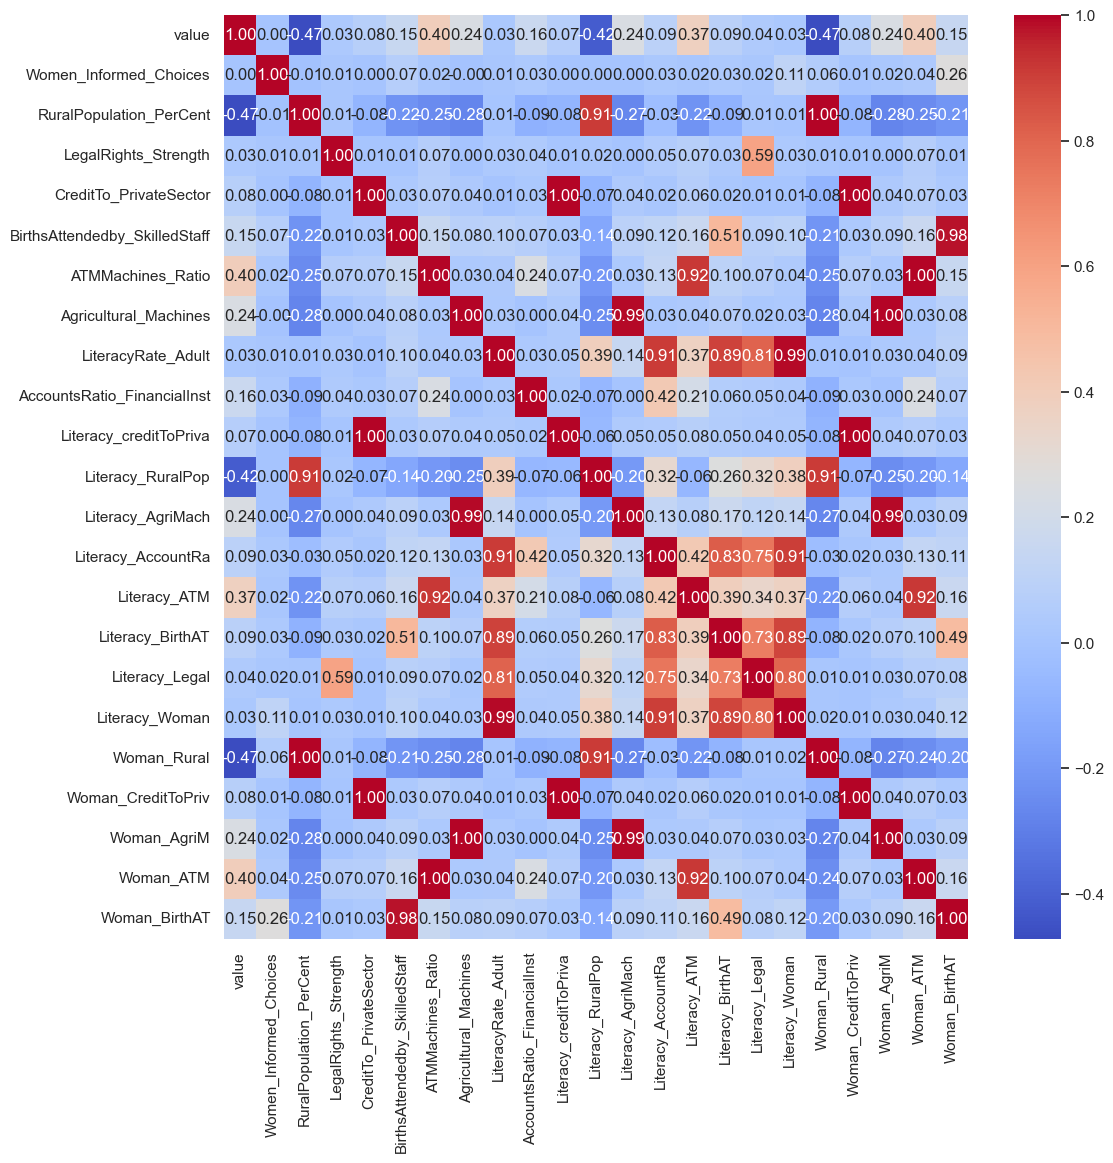

In [183]:
plt.figure(figsize=(12,12))
numeric_columns = GDP_Combine.select_dtypes(include=[np.number]).columns
corr_matrix = GDP_Combine[numeric_columns].corr()
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [184]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
### BEGIN SOLUTION

GDP_Combine_new_X = GDP_Combine_new.drop(['value'],axis=1)
GDP_Combine_new_X.rename(columns={'variable':'Year'}, inplace=True)
GDP_Combine_new_X = GDP_Combine_new_X[['Year','Women_Informed_Choices','RuralPopulation_PerCent','LegalRights_Strength',
                                       'CreditTo_PrivateSector','BirthsAttendedby_SkilledStaff','ATMMachines_Ratio',
                                       'Agricultural_Machines','LiteracyRate_Adult','AccountsRatio_FinancialInst',
                                      'Literacy_creditToPriva','Literacy_RuralPop','Literacy_AgriMach',
                                       'Literacy_AccountRa','Literacy_ATM','Literacy_BirthAT','Literacy_Legal',
                                       'Literacy_Woman','Woman_Rural','Woman_CreditToPriv','Woman_AgriM','Woman_ATM',
                                       'Woman_BirthAT']]

GDP_Combine_new_Y = GDP_Combine_new['value']
print(GDP_Combine_new_X.shape,GDP_Combine_new_Y.shape)

X_train_new,X_test_new,Y_train_new,Y_test_new = train_test_split(GDP_Combine_new_X,GDP_Combine_new_Y,test_size=0.2,random_state=40)

(11504, 23) (11504,)


In [185]:
#Random Forest tree method
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from pandas import Series, DataFrame
from sklearn.model_selection import cross_val_score

Rfreg_new = RandomForestRegressor(max_features=23, n_estimators=30)
Rfreg_new .fit(X_train_new , Y_train_new )
Rfreg_y_pred_train_new  = Rfreg_new .predict(X_train_new )
train_mse_Rfreg_new  = np.sqrt(mean_squared_error(Y_train_new ,Rfreg_y_pred_train_new))

#testing the model
Rfreg_y_pred_test_new  = Rfreg_new.predict(X_test_new )
test_mse_Rfreg_new  = np.sqrt(mean_squared_error(Y_test_new ,Rfreg_y_pred_test_new))
 
#cross validation

Rfreg_kf_new  = RandomForestRegressor(max_features=10, n_estimators=30)

print("New RMSE_train_Random= ",train_mse_Rfreg_new,
     "\nNew RMSE_test_Random= ",test_mse_Rfreg_new,
     "\nNew train_Rfeg score= ",Rfreg_new .score(X_train_new ,Y_train_new ),
     "\nNew test_Rfeg score= ",Rfreg_new .score(X_test_new ,Y_test_new ),
     "\nNew Cross validation score",cross_val_score(Rfreg_kf_new , GDP_Combine_new_X , GDP_Combine_new_Y,cv=4))

New RMSE_train_Random=  2875.0680539449822 
New RMSE_test_Random=  5411.761659276142 
New train_Rfeg score=  0.9582162984744381 
New test_Rfeg score=  0.8617450641456265 
New Cross validation score [-3.73105287  0.57349174  0.66878511  0.54995155]


In [186]:
# Reduced Model 1
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
model = LinearRegression()
Y = GDP_Combine['value']
#X =  GDP_Combine['BirthsAttendedby_SkilledStaff'] + GDP_Combine['Women_Informed_Choices'] + GDP_Combine['RuralPopulation_PerCent'] + GDP_Combine['CreditTo_PrivateSector'] + GDP_Combine['ATMMachines_Ratio']+ GDP_combine['LiteracyRate_Adult']
X = GDP_Combine['RuralPopulation_PerCent'] + GDP_Combine['BirthsAttendedby_SkilledStaff'] + GDP_Combine['ATMMachines_Ratio'] 
print(Y.size)
print(X.size)

RuralPopulation_PerCent = GDP_Combine['RuralPopulation_PerCent'] 

BirthsAttendedby_SkilledStaff = GDP_Combine['BirthsAttendedby_SkilledStaff']
ATMMachines_Ratio = GDP_Combine['ATMMachines_Ratio']

#model_hyp = ols("GDP_Combine_Y ~ GDP_Combine_X", X_train).fit()
model_hyp_reduced1 = ols('Y ~RuralPopulation_PerCent + BirthsAttendedby_SkilledStaff + ATMMachines_Ratio', GDP_Combine).fit()
print(model_hyp_reduced1.summary())

11504
11504
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     1687.
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:38:06   Log-Likelihood:            -1.2419e+05
No. Observations:               11504   AIC:                         2.484e+05
Df Residuals:                   11500   BIC:                         2.484e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
In

In [187]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
model = LinearRegression()
Y = GDP_Combine['value']
#X =  GDP_Combine['BirthsAttendedby_SkilledStaff'] + GDP_Combine['Women_Informed_Choices'] + GDP_Combine['RuralPopulation_PerCent'] + GDP_Combine['CreditTo_PrivateSector'] + GDP_Combine['ATMMachines_Ratio']+ GDP_combine['LiteracyRate_Adult']
X = GDP_Combine['Women_Informed_Choices'] + GDP_Combine['RuralPopulation_PerCent'] + GDP_Combine['CreditTo_PrivateSector'] + GDP_Combine['BirthsAttendedby_SkilledStaff'] + GDP_Combine['ATMMachines_Ratio'] + GDP_Combine['LiteracyRate_Adult']
print(Y.size)
print(X.size)
Women_Informed_Choices = GDP_Combine['Women_Informed_Choices']
RuralPopulation_PerCent = GDP_Combine['RuralPopulation_PerCent'] 
CreditTo_PrivateSector = GDP_Combine['CreditTo_PrivateSector']
BirthsAttendedby_SkilledStaff = GDP_Combine['BirthsAttendedby_SkilledStaff']
ATMMachines_Ratio = GDP_Combine['ATMMachines_Ratio']
LiteracyRate_Adult = GDP_Combine['LiteracyRate_Adult']
#model_hyp = ols("GDP_Combine_Y ~ GDP_Combine_X", X_train).fit()
model_hyp_reduced2 = ols('Y ~ Women_Informed_Choices + RuralPopulation_PerCent + CreditTo_PrivateSector + BirthsAttendedby_SkilledStaff + ATMMachines_Ratio + LiteracyRate_Adult', GDP_Combine).fit()
print(model_hyp_reduced2.summary())

11504
11504
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     846.5
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:38:09   Log-Likelihood:            -1.2418e+05
No. Observations:               11504   AIC:                         2.484e+05
Df Residuals:                   11497   BIC:                         2.484e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
In

In [188]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
model = LinearRegression()
Y = GDP_Combine['value']
#X =  GDP_Combine['BirthsAttendedby_SkilledStaff'] + GDP_Combine['Women_Informed_Choices'] + GDP_Combine['RuralPopulation_PerCent'] + GDP_Combine['CreditTo_PrivateSector'] + GDP_Combine['ATMMachines_Ratio']+ GDP_combine['LiteracyRate_Adult']
X = GDP_Combine['Women_Informed_Choices'] + GDP_Combine['RuralPopulation_PerCent'] + GDP_Combine['CreditTo_PrivateSector'] + GDP_Combine['BirthsAttendedby_SkilledStaff'] + GDP_Combine['ATMMachines_Ratio'] + GDP_Combine['LiteracyRate_Adult']
print(Y.size)
print(X.size)
Women_Informed_Choices = GDP_Combine['Women_Informed_Choices']
RuralPopulation_PerCent = GDP_Combine['RuralPopulation_PerCent'] 
CreditTo_PrivateSector = GDP_Combine['CreditTo_PrivateSector']
BirthsAttendedby_SkilledStaff = GDP_Combine['BirthsAttendedby_SkilledStaff']
ATMMachines_Ratio = GDP_Combine['ATMMachines_Ratio']
LiteracyRate_Adult = GDP_Combine['LiteracyRate_Adult']
LegalRights_Strength = GDP_Combine['LegalRights_Strength']
Agricultural_Machines = GDP_Combine['Agricultural_Machines']
AccountsRatio_FinancialInst = GDP_Combine['AccountsRatio_FinancialInst']

#model_hyp = ols("GDP_Combine_Y ~ GDP_Combine_X", X_train).fit()
model_hyp_full = ols('Y ~ Women_Informed_Choices + RuralPopulation_PerCent + CreditTo_PrivateSector + BirthsAttendedby_SkilledStaff + ATMMachines_Ratio + LiteracyRate_Adult + LegalRights_Strength + Agricultural_Machines + AccountsRatio_FinancialInst', GDP_Combine).fit()
print(model_hyp_full.summary())
type(X)

11504
11504
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     616.6
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:38:11   Log-Likelihood:            -1.2402e+05
No. Observations:               11504   AIC:                         2.481e+05
Df Residuals:                   11494   BIC:                         2.481e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
In

pandas.core.series.Series

In [189]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
model = LinearRegression()
Y = GDP_Combine_new['value']
#X =  GDP_Combine['BirthsAttendedby_SkilledStaff'] + GDP_Combine['Women_Informed_Choices'] + GDP_Combine['RuralPopulation_PerCent'] + GDP_Combine['CreditTo_PrivateSector'] + GDP_Combine['ATMMachines_Ratio']+ GDP_combine['LiteracyRate_Adult']
X = GDP_Combine_new['Women_Informed_Choices'] + GDP_Combine_new['RuralPopulation_PerCent'] + GDP_Combine_new['CreditTo_PrivateSector'] + GDP_Combine_new['BirthsAttendedby_SkilledStaff'] + GDP_Combine_new['ATMMachines_Ratio'] + GDP_Combine_new['LiteracyRate_Adult'] + GDP_Combine_new['Literacy_creditToPriva'] + GDP_Combine_new['Literacy_RuralPop'] + GDP_Combine_new['Literacy_AgriMach'] + GDP_Combine_new['Literacy_AccountRa'] + GDP_Combine_new['Literacy_ATM'] + GDP_Combine_new['Literacy_BirthAT']+ GDP_Combine_new['Literacy_Legal'] + GDP_Combine_new['Literacy_Woman'] + GDP_Combine_new['Woman_Rural'] + GDP_Combine_new['Woman_CreditToPriv']+ GDP_Combine_new['Woman_AgriM'] + GDP_Combine_new['Woman_ATM'] + GDP_Combine_new['Woman_BirthAT']
print(Y.size)
print(X.size)

Women_Informed_Choices = GDP_Combine_new['Women_Informed_Choices']
RuralPopulation_PerCent = GDP_Combine_new['RuralPopulation_PerCent'] 
CreditTo_PrivateSector = GDP_Combine_new['CreditTo_PrivateSector']
BirthsAttendedby_SkilledStaff = GDP_Combine_new['BirthsAttendedby_SkilledStaff']
ATMMachines_Ratio = GDP_Combine_new['ATMMachines_Ratio']
LiteracyRate_Adult = GDP_Combine_new['LiteracyRate_Adult']
LegalRights_Strength = GDP_Combine_new['LegalRights_Strength']
Agricultural_Machines = GDP_Combine_new['Agricultural_Machines']
AccountsRatio_FinancialInst = GDP_Combine_new['AccountsRatio_FinancialInst']
Literacy_creditToPriva = GDP_Combine_new['Literacy_creditToPriva']
Literacy_RuralPop = GDP_Combine_new['Literacy_RuralPop']
Literacy_AgriMach = GDP_Combine_new['Literacy_AgriMach']
Literacy_AccountRa = GDP_Combine_new['Literacy_AccountRa']
Literacy_ATM = GDP_Combine_new['Literacy_ATM']
Literacy_BirthAT = GDP_Combine_new['Literacy_BirthAT']
Literacy_Legal = GDP_Combine_new['Literacy_Legal']
Literacy_Woman = GDP_Combine_new['Literacy_Woman']
Woman_Rural = GDP_Combine_new['Woman_Rural']
Woman_CreditToPriv = GDP_Combine_new['Woman_CreditToPriv']
Woman_AgriM = GDP_Combine_new['Woman_AgriM']
Woman_ATM = GDP_Combine_new['Woman_ATM']
Woman_BirthAT = GDP_Combine_new['Woman_BirthAT']



model_hyp_full_new = ols('Y ~ Women_Informed_Choices + RuralPopulation_PerCent + CreditTo_PrivateSector + BirthsAttendedby_SkilledStaff + ATMMachines_Ratio + LiteracyRate_Adult + LegalRights_Strength + Agricultural_Machines + AccountsRatio_FinancialInst + Literacy_creditToPriva + Literacy_RuralPop + Literacy_AgriMach + Literacy_AccountRa + Literacy_ATM + Literacy_BirthAT + Literacy_Legal + Literacy_Woman + Woman_Rural + Woman_CreditToPriv + Woman_AgriM + Woman_ATM + Woman_BirthAT', GDP_Combine_new).fit()
print(model_hyp_full_new.summary())
type(X)



11504
11504
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     255.1
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:38:13   Log-Likelihood:            -1.2400e+05
No. Observations:               11504   AIC:                         2.480e+05
Df Residuals:                   11481   BIC:                         2.482e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
In

pandas.core.series.Series

In [190]:
perf = pd.DataFrame({"Model": Models})
perf["Train.RMSE"] = train_rmses.values()
perf["Test.RMSE"] = test_rmses.values()
perf['Kfold'] = Kfold.values()
perf['RSquare_train'] = RSquare_train.values()
perf['RSquare_test'] = RSquare_test.values()
perf

,Model,Train.RMSE,Test.RMSE,Kfold,RSquare_train,RSquare_test
0,Multiple Linear Regression,11098.558146,11357.502081,13705.852650,0.377350,0.391068
1,Polynomial Regression,9165.460689,161563.548598,17977.418185,0.575362,0.550000
2,Decision Tree Regression,2255.186797,6578.397991,15368.879810,0.974292,0.795712
3,Random Forest Regression,2813.060489,5437.343328,11614.419375,0.959999,0.860435
4,Ridge Regression,11098.558146,11357.502081,12424.701577,0.377350,0.391068
5,Lasso Regression,11098.558146,11357.502081,12424.701577,0.377350,0.391068
6,Elastic Net Regression,11098.558146,11357.503028,12424.701576,0.377350,0.391068


In [194]:
GDP_Combine.head(5)

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,...,Literacy_AccountRa,Literacy_ATM,Literacy_BirthAT,Literacy_Legal,Literacy_Woman,Woman_Rural,Woman_CreditToPriv,Woman_AgriM,Woman_ATM,Woman_BirthAT
1,Afghanistan,AFG,1960,59.777327,46.753333,91.779,5.01029,9.272727,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,4290.974180,433.530882,13414.93254,1873.904281,4087.096874
11,Australia,AUS,1960,1809.311452,46.753333,18.471,5.01029,19.129021,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,863.580820,894.345476,13414.93254,1873.904281,4087.096874
12,Austria,AUT,1960,935.460427,46.753333,35.280,5.01029,44.704804,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,1649.457600,2090.098615,13414.93254,1873.904281,4087.096874
14,Burundi,BDI,1960,70.349079,46.753333,97.923,5.01029,44.704804,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,4578.226660,2090.098615,13414.93254,1873.904281,4087.096874
15,Belgium,BEL,1960,1273.691659,46.753333,7.540,5.01029,44.704804,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.93254,352.520133,2090.098615,13414.93254,1873.904281,4087.096874


In [195]:
#Country = Belgium
X_sample = GDP_Combine_X
X_sample['Year'] = 1960
X_sample['Women_Informed_Choices'] = 46.753333
X_sample['RuralPopulation_PerCent'] = 7.540
X_sample['LegalRights_Strength'] = 5.01029
X_sample['CreditTo_PrivateSector'] = 44.704804
X_sample['BirthsAttendedby_SkilledStaff'] = 87.418299
X_sample['ATMMachines_Ratio'] = 40.080656
X_sample['Agricultural_Machines'] = 286.92997
X_sample['LiteracyRate_Adult'] = 286.92997
X_sample['AccountsRatio_FinancialInst'] = 52.493345

In [196]:
Rfreg_y_pred_sample = Rfreg.predict(X_sample)
print('The predicted GDP valus is:',Rfreg_y_pred_sample.max())

The predicted GDP valus is: 1294.0845296785349


In [197]:
'''Australia
AUS
1960
1809.311452
'''
X_sample1 = GDP_Combine_X
X_sample1['Year'] = 1960
X_sample1['Women_Informed_Choices'] = 46.753333
X_sample1['RuralPopulation_PerCent'] = 18.471
X_sample1['LegalRights_Strength'] = 5.01029
X_sample1['CreditTo_PrivateSector'] = 19.129021
X_sample1['BirthsAttendedby_SkilledStaff'] = 87.418299
X_sample1['ATMMachines_Ratio'] = 40.080656
X_sample1['Agricultural_Machines'] = 286.92997
X_sample1['LiteracyRate_Adult'] = 286.92997
X_sample1['AccountsRatio_FinancialInst'] = 52.493345

In [198]:
Rfreg_y_pred_sample1 = Rfreg.predict(X_sample1)
Rfreg_y_pred_sample1.max()

1310.4248208815359

In [199]:
X_sample2 = GDP_Combine_X
X_sample2['Year'] = 1960
X_sample2['Women_Informed_Choices'] = 46.753333
X_sample2['RuralPopulation_PerCent'] = 30.939
X_sample2['LegalRights_Strength'] = 5.01029
X_sample2['CreditTo_PrivateSector'] = 18.260185
X_sample2['BirthsAttendedby_SkilledStaff'] = 87.418299
X_sample2['ATMMachines_Ratio'] = 40.080656
X_sample2['Agricultural_Machines'] = 286.92997
X_sample2['LiteracyRate_Adult'] = 286.92997
X_sample2['AccountsRatio_FinancialInst'] = 52.493345

In [200]:
Rfreg_y_pred_sample2 = Rfreg.predict(X_sample2)
Rfreg_y_pred_sample2.max()

1834.3875008919745

In [201]:
GDP_Combine.tail(20)

,Country Name,Country Code,variable,value,Women_Informed_Choices,RuralPopulation_PerCent,LegalRights_Strength,CreditTo_PrivateSector,BirthsAttendedby_SkilledStaff,ATMMachines_Ratio,...,Literacy_AccountRa,Literacy_ATM,Literacy_BirthAT,Literacy_Legal,Literacy_Woman,Woman_Rural,Woman_CreditToPriv,Woman_AgriM,Woman_ATM,Woman_BirthAT
15025,Tunisia,TUN,2016,3688.646375,46.753333,32.953000,3.000000,81.155319,87.418299,27.440945,...,15061.913946,7873.629426,25082.929938,860.789911,13414.932540,1540.662593,3794.281696,13414.93254,1282.955631,4087.096874
15026,Turkey,TUR,2016,10862.600399,46.753333,26.113000,2.000000,69.852675,87.418299,78.076702,...,15061.913946,22402.545900,25082.929938,573.859940,13414.932540,1220.869793,3265.845384,13414.93254,3650.346094,4087.096874
15027,Tuvalu,TUV,2016,3083.615251,46.753333,39.380000,5.010290,44.704804,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,1437.602391,13414.932540,1841.146267,2090.098615,13414.93254,1873.904281,4087.096874
15028,Tanzania,TZA,2016,851.866046,46.753333,67.684000,5.000000,14.278778,63.700000,40.080656,...,15061.913946,11500.341497,18277.439102,1434.649851,13414.932540,3164.452613,667.580477,13414.93254,1873.904281,2978.187333
15029,Uganda,UGA,2016,580.383539,46.753333,83.556000,6.000000,14.545330,87.418299,4.365255,...,15061.913946,1252.522508,25082.929938,1721.579821,13414.932540,3906.521520,680.042663,13414.93254,204.090225,4087.096874
15030,Ukraine,UKR,2016,2072.463395,46.753333,30.085000,8.000000,47.334073,87.418299,88.553238,...,15061.913946,25408.578018,25082.929938,2295.439762,13414.932540,1406.574033,2213.025710,13414.93254,4140.159067,4087.096874
15031,Upper middle income,UMC,2016,7994.022621,46.753333,34.954541,5.137255,118.992695,87.418299,57.606234,...,5067.141658,5560.684821,8438.420220,495.895209,4513.062799,1634.241324,5563.305129,13414.93254,2693.283453,4087.096874
15032,Uruguay,URY,2016,15220.566025,46.753333,4.540000,4.000000,28.161111,87.418299,81.980145,...,15061.913946,23522.560528,25082.929938,1147.719881,13414.932540,212.260133,1316.625810,13414.93254,3832.845040,4087.096874
15033,United States,USA,2016,57638.159088,46.753333,18.212000,11.000000,192.165500,87.418299,40.080656,...,15061.913946,11500.341497,25082.929938,3156.229672,13414.932540,851.471707,8984.377670,13414.93254,1873.904281,4087.096874
15034,Uzbekistan,UZB,2016,2110.647872,46.753333,63.521000,6.000000,44.704804,87.418299,21.597743,...,15061.913946,6197.039663,25082.929938,1721.579821,13414.932540,2969.818487,2090.098615,13414.93254,1009.766463,4087.096874


In [202]:
#Country = United States
X_sample2 = GDP_Combine_X
X_sample2['Year'] = 2016
X_sample2['Women_Informed_Choices'] = 46.753333
X_sample2['RuralPopulation_PerCent'] = 18.212000
X_sample2['LegalRights_Strength'] = 11.000000
X_sample2['CreditTo_PrivateSector'] = 192.165500
X_sample2['BirthsAttendedby_SkilledStaff'] = 87.418299
X_sample2['ATMMachines_Ratio'] = 40.080656
X_sample2['Agricultural_Machines'] = 286.92997
X_sample2['LiteracyRate_Adult'] = 286.92997
X_sample2['AccountsRatio_FinancialInst'] = 52.493345

In [203]:
Rfreg_y_pred_sample2 = Rfreg.predict(X_sample2)
print('The predcited GDP value is :',Rfreg_y_pred_sample2.max())

The predcited GDP value is : 57163.43703383293
